In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Phase 2

'''
Note :
You need to be careful as this phase is whole state/ut wise analysis (not district-wise).
It is up to you which columns you want to keep or delete to make proper analysis"

2.1 Analysis of Literacy rate vs Total crimes.

2.2 Analysis of the type of crime vs each state vs Literacy rate.

2.3 Analysis of year-on-year total crime rate.

2.4 Analysis of area vs overall crime

2.5 Analysis of population vs overall crime

2.6 Each state crime report. There is no fixed format to write a report, 
you can write a report inside the notebook itself based on what you have analyzed in the above points.

'''


In [3]:
'''Import data that was collected in a previous phase of project'''
state_info = pd.read_csv('state info')
state_info.head()

State name  population  Literate population  Literacy rate  \
0  Andaman & Nicobar Islands      380581               294281          86.63   
1             Andhra Pradesh   119774755             73974832          66.78   
2          Arunachal Pradesh     1383727               766005          65.38   
3                      Assam    31205576             19177977          72.19   
4                      Bihar   104099452             52504553          61.80   

   area in square km  Unemployment rate in rural  Unemployment rate in urban  
0               8249                         5.4                         8.6  
1             171482                         1.2                         4.3  
2              83743                         1.7                         4.8  
3              78438                         4.5                         5.6  
4              94163                         3.2                         5.6

In [4]:
state_info.size

245

In [5]:
state_info.shape

(35, 7)

In [6]:
'''Crime commited IPC 2001-2012'''
district_crime = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
district_crime

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9013     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9014     LAKSHADWEEP          TOTAL  2012       0                  0   
9015      PUDUCHERRY       KARAIKAL  2012       5                  6   
9016      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9017      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50               0   
1                                             1    23               0   
2                                             2    27               0   
3                                             1    20               0   
4                                             1    23               0   
...                                         ...   ...             ...   
9013                                          0     0               0   
9014                                          0     0               0   
9015                                          2     6               0   
9016                                         10     7               0   
9017                                         12    13               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  \
0             50                      46   
1             23                      53   
2             27                      59   
3             20                      25   
4             23                      49   
...          ...                     ...   
9013           0                       0   
9014           0                       0   
9015           6                       2   
9016           7                      17   
9017          13                      19   

      KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                              30   
1                                              30   
2                                              34   
3                                              20   
4                                              26   
...                                           ...   
9013                                            0   
9014                                            0   
9015                                            2   
9016                                           14   
9017                                           16   

      KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                     16        9   
1                                     23        8   
2                                     25        4   
3                                      5        1   
4                                     23        4   
...                                  ...      ...   
9013                                   0        0   
9014                                   0        0   
9015                                   0        0   
9016                                   3        5   
9017                                   3        5   

      PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
0                                        0       41       198    199   
1                                        0       16       191    366   
2                                        0       14       237    723   
3                                        0        4        98    173   
4                                        0       25       437   1021   
...                                

In [7]:
district_crime.shape

(9018, 33)

In [8]:
district_crime.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [9]:
district_crime['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [10]:
index = np.where(district_crime['DISTRICT']=='TOTAL')
index

(array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
         285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
         534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
         715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
         970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
        1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
        1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
        1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
        1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
        2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
        2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
        2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
        2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
        3091, 3105, 3130, 3155, 3187, 

In [11]:
total_dict_crime = pd.DataFrame(columns=district_crime.columns)

In [12]:
total_dict_crime

Empty DataFrame
Columns: [STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, CULPABLE HOMICIDE NOT AMOUNTING TO MURDER, RAPE, CUSTODIAL RAPE, OTHER RAPE, KIDNAPPING & ABDUCTION, KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS, KIDNAPPING AND ABDUCTION OF OTHERS, DACOITY, PREPARATION AND ASSEMBLY FOR DACOITY, ROBBERY, BURGLARY, THEFT, AUTO THEFT, OTHER THEFT, RIOTS, CRIMINAL BREACH OF TRUST, CHEATING, COUNTERFIETING, ARSON, HURT/GREVIOUS HURT, DOWRY DEATHS, ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY, INSULT TO MODESTY OF WOMEN, CRUELTY BY HUSBAND OR HIS RELATIVES, IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES, CAUSING DEATH BY NEGLIGENCE, OTHER IPC CRIMES, TOTAL IPC CRIMES]
Index: []

In [13]:
for i in index:
    total_dict_crime = total_dict_crime.append([district_crime.loc[i]],ignore_index=True)

In [14]:
total_dict_crime

STATE/UT DISTRICT  YEAR MURDER ATTEMPT TO MURDER  \
0       ANDHRA PRADESH    TOTAL  2001   2602              1555   
1    ARUNACHAL PRADESH    TOTAL  2001     83                53   
2                ASSAM    TOTAL  2001   1356               481   
3                BIHAR    TOTAL  2001   3643              3419   
4         CHHATTISGARH    TOTAL  2001    880               529   
..                 ...      ...   ...    ...               ...   
404       D & N HAVELI    TOTAL  2012      7                 2   
405        DAMAN & DIU    TOTAL  2012      3                 5   
406           DELHI UT    TOTAL  2012   1042               878   
407        LAKSHADWEEP    TOTAL  2012      0                 0   
408         PUDUCHERRY    TOTAL  2012     29                27   

    CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE CUSTODIAL RAPE OTHER RAPE  \
0                                         136   871              0        871   
1                                           3    33              0         33   
2                                          40   817              0        817   
3                                         250   888              0        888   
4                                          45   959              0        959   
..                                        ...   ...            ...        ...   
404                                         0     3              0          3   
405                                         0     5              0          5   
406                                       164  1412              0       1412   
407                                         0     0              0          0   
408                                        12    13              0         13   

    KIDNAPPING & ABDUCTION KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                     1182                                         765   
1                       83                                          55   
2                     1480                                        1070   
3                     2159                                         518   
4                      207                                         171   
..                     ...                                         ...   
404                     13                                           9   
405                      3                                           0   
406                   7940                                        4320   
407                      0                                           0   
408                     19                                          16   

    KIDNAPPING AND ABDUCTION OF OTHERS DACOITY  \
0                                  417     214   
1                                   28      22   
2                                  410     532   
3                                 1641    1291   
4                                   36      87   
..                                 ...     ...   
404                                  4       2   
405                                  3       1   
406                               3620      56   
407                                  0       0   
408                                  3       5   

    PREPARATION AND ASSEMBLY FOR DACOITY ROBBERY BURGLARY  THEFT AUTO THEFT  \
0                                      9     629     7220  16751       3051   
1                                      2      84      248    443         36   
2                                     14     687     2423   5367        350   
3                                    147    2203     3233   9701       1050   
4                                     19     338     4144   4812        920   
..                                   ...     ...      ...    ...        ...   
404                                    0       2       22     68         36   
405                                    0       3       26     55         42   
406                                   26    121

## 2.1 Analysis of Literacy rate vs Total crimes.

In [15]:
'''Total crime commited between 2001 to 2012'''
'''Total Crime by state'''
grp_by_state = total_dict_crime.groupby('STATE/UT')
grp_by_state_sum = grp_by_state.sum()
total_crime_by_state = grp_by_state_sum.drop(['DISTRICT','YEAR'],axis=1)
total_crime_by_state.reset_index(inplace=True)
total_crime_by_state.head()

STATE/UT  MURDER  ATTEMPT TO MURDER  \
0      A & N ISLANDS     160                 65   
1     ANDHRA PRADESH   31756              22420   
2  ARUNACHAL PRADESH     841                417   
3              ASSAM   15432               5662   
4              BIHAR   41245              40919   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  CUSTODIAL RAPE  \
0                                         21    109               0   
1                                       1763  13479               2   
2                                         36    500               0   
3                                        718  16178               5   
4                                       3672  13124               2   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0         109                      94   
1       13477                   21239   
2         500                     857   
3       16173                   27939   
4       13122                   37220   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                           77   
1                                        14936   
2                                          558   
3                                        22920   
4                                        19389   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                  17       15   
1                                6303     1987   
2                                 299      260   
3                                5019     4170   
4                               17831    11099   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY   THEFT  \
0                                     0       74       892    1124   
1                                    80     7605     97336  287190   
2                                     4      843      2780    5178   
3                                   253     7467     34752   85475   
4                                  1265    23666     40293  153372   

   AUTO THEFT  OTHER THEFT   RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  \
0          85         1039     140                        72       253   
1       72644       214546   27459                     12128     98843   
2        1076         4102     340                       505       520   
3       15479        69996   34963                      8402     12391   
4       34221       119151  105096                     15528     30690   

   COUNTERFIETING  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0              11     98                1105             6   
1            3107  11968              546565          6215   
2              52    250                5157             2   
3             898   7918               69183          1276   
4             826   8509              189266         13548   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                214     
1                                              51999     
2                                                784     
3                                              13620     
4                                               7576     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          43                                  121   
1                       36131                               119007   
2                          18                                  167   
3                         112                                39388   
4                         226                                25680   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                           42   
1                                           17                       138435   
2                                            0                          745   
3                                            8                        30205   
4                        

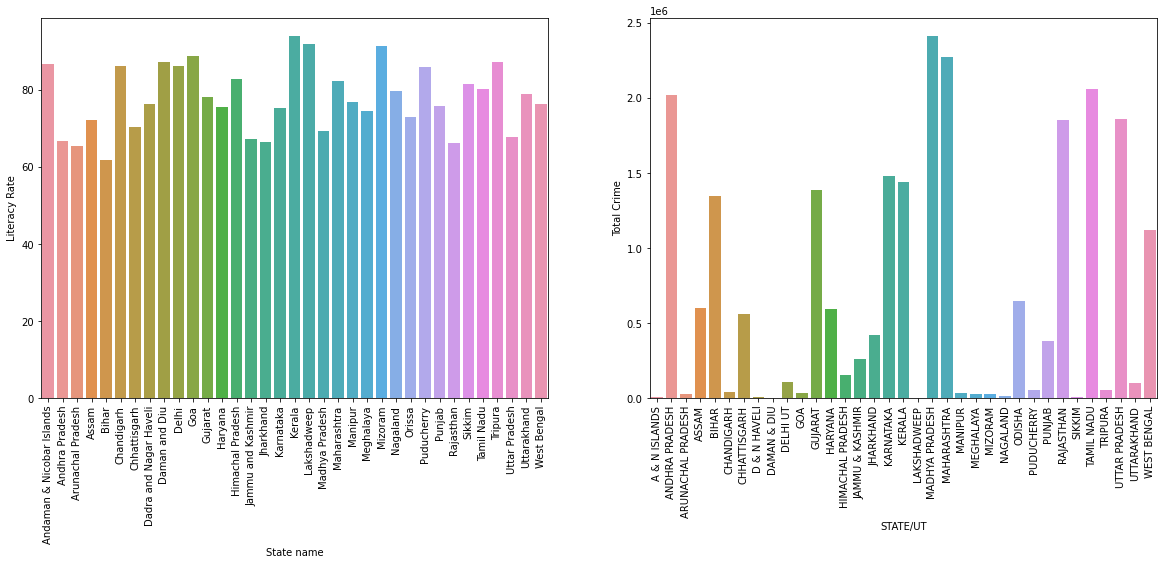

'\n1.In Madhya Pradesh commited highest Numbers of crime and Litercay rate of MP is also very low.\nbihar,rajstan and andhra aslo have very less literacy rate ande high total crime\n2.Kreala has highest literacy rate.\n3.here we can see there mix relationship Literacy Rate and Total crime.\n4.for example Maharashtra has very Good Literacy rate but aslo have higher number of total crime commited. thats mean there no \nralation between litercay rate and total crime in this case.\n5.in other hand Goa has 4th High Literacy Rate state but there very less crime commited as compair to maharashtra.\n6.some State have very small total of crime commoted because of small population of that state.\n'

In [16]:
'''Total Crimes by State VS Literacy Rate'''

plt.figure(figsize=(20,7))

ax = plt.subplot(1,2,1)
sns.barplot(x=state_info['State name'],y= state_info['Literacy rate'])
plt.ylabel("Literacy Rate")
plt.xticks(rotation = 90)

ax = plt.subplot(1,2,2)
sns.barplot( x=total_crime_by_state['STATE/UT'], y = total_crime_by_state['TOTAL IPC CRIMES'])
plt.ylabel("Total Crime")
plt.xticks(rotation = 90)

plt.show()

#OBSERVATIONS
'''
1.In Madhya Pradesh commited highest Numbers of crime and Litercay rate of MP is also very low.
bihar,rajstan and andhra aslo have very less literacy rate ande high total crime
2.Kreala has highest literacy rate.
3.here we can see there mix relationship Literacy Rate and Total crime.
4.for example Maharashtra has very Good Literacy rate but aslo have higher number of total crime commited. thats mean there no 
ralation between litercay rate and total crime in this case.
5.in other hand Goa has 4th High Literacy Rate state but there very less crime commited as compair to maharashtra.
6.some State have very small total of crime commoted because of small population of that state.
'''

In [17]:
print('Observation:')
print('Top 5 state by Litrracy rate')
print(state_info[['State name','Literacy rate']].sort_values('Literacy rate',ascending=False).head())
print('\n')
print('Top 5 state by total comited crime')
print(total_crime_by_state[['STATE/UT','TOTAL IPC CRIMES']].sort_values('TOTAL IPC CRIMES',ascending=False).head())

Observation:
Top 5 state by Litrracy rate
     State name  Literacy rate
17       Kerala          94.00
18  Lakshadweep          91.85
23      Mizoram          91.33
10          Goa          88.70
31      Tripura          87.22


Top 5 state by total comited crime
          STATE/UT  TOTAL IPC CRIMES
19  MADHYA PRADESH           2413770
20     MAHARASHTRA           2273436
30      TAMIL NADU           2060176
1   ANDHRA PRADESH           2018981
32   UTTAR PRADESH           1858074


In [18]:
print('Observation:')
print('Lowest 5 state by Litrracy rate')
print(state_info[['State name','Literacy rate']].sort_values('Literacy rate',ascending=True).head())
print('\n')
print('Lowest 5 state by total comited crime')
print(total_crime_by_state[['STATE/UT','TOTAL IPC CRIMES']].sort_values('TOTAL IPC CRIMES',ascending=True).head())

Observation:
Lowest 5 state by Litrracy rate
           State name  Literacy rate
4               Bihar          61.80
2   Arunachal Pradesh          65.38
28          Rajasthan          66.11
15          Jharkhand          66.41
1      Andhra Pradesh          66.78


Lowest 5 state by total comited crime
         STATE/UT  TOTAL IPC CRIMES
18    LAKSHADWEEP               743
8     DAMAN & DIU              2948
7    D & N HAVELI              4651
29         SIKKIM              7000
0   A & N ISLANDS              9102


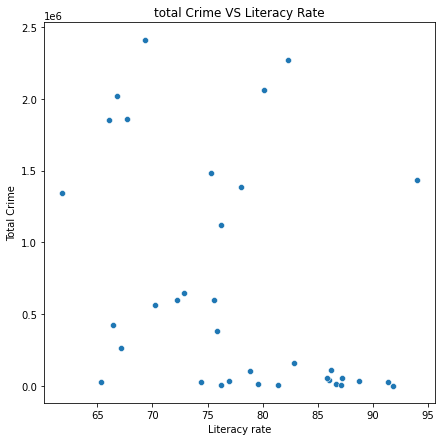

'\nin below chart we can see higher litercay state having low total crime but total crime is dependent on other factors like\nemployment rate and population etc\n'

In [19]:
plt.figure(figsize=(7,7))
sns.scatterplot(x= state_info['Literacy rate'],y= total_crime_by_state['TOTAL IPC CRIMES'])
plt.title('total Crime VS Literacy Rate')
plt.xlabel('Literacy rate')
plt.ylabel('Total Crime')
plt.show()

# OBSERVATION
'''
in below chart we can see higher litercay state having low total crime but total crime is dependent on other factors like
employment rate and population etc
'''

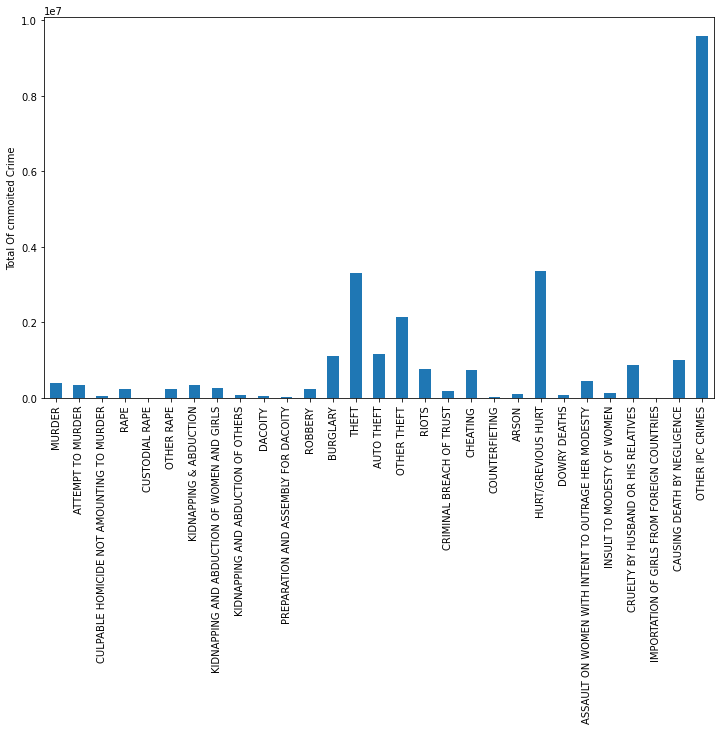

In [20]:
commited_crime = total_crime_by_state.drop(['STATE/UT','TOTAL IPC CRIMES'],axis=1).sum()

plt.figure(figsize=(12,7))
commited_crime.plot(kind='bar',)
plt.ylabel("Total Of cmmoited Crime")
plt.xticks(rotation = 90)

plt.show()

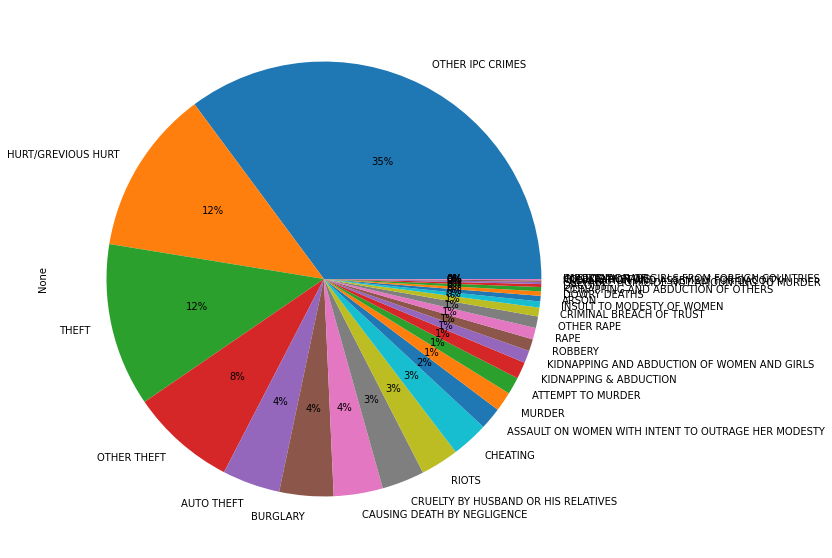

'\nAny type of theft is very commn type of crime in india\n35% of crime are comes under otjere IPC sections.\n\n'

In [21]:
plt.figure(figsize=(10,10))
commited_crime.sort_values(ascending=False).plot(kind='pie',autopct='%1.0f%%')
plt.show()

#OBSERVATTIONS
'''
Any type of theft is very commn type of crime in india
35% of crime are comes under otjere IPC sections.

'''

In [22]:
"OBSERVATION"

print('''Top Five crimes types commited in india''')
print(commited_crime.sort_values(ascending=False).head(5))
print('\n')
print('''Bottom Five crime types commited in india''')
print(commited_crime.sort_values(ascending=False).tail(5))

Top Five crimes types commited in india
OTHER IPC CRIMES      9596188
HURT/GREVIOUS HURT    3353160
THEFT                 3313048
OTHER THEFT           2140913
AUTO THEFT            1172135
dtype: int64


Bottom Five crime types commited in india
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER      43895
PREPARATION AND ASSEMBLY FOR DACOITY           30726
COUNTERFIETING                                 26320
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES      891
CUSTODIAL RAPE                                    26
dtype: int64


## 2.2 Analysis of the type of crime vs each state vs Literacy rate.

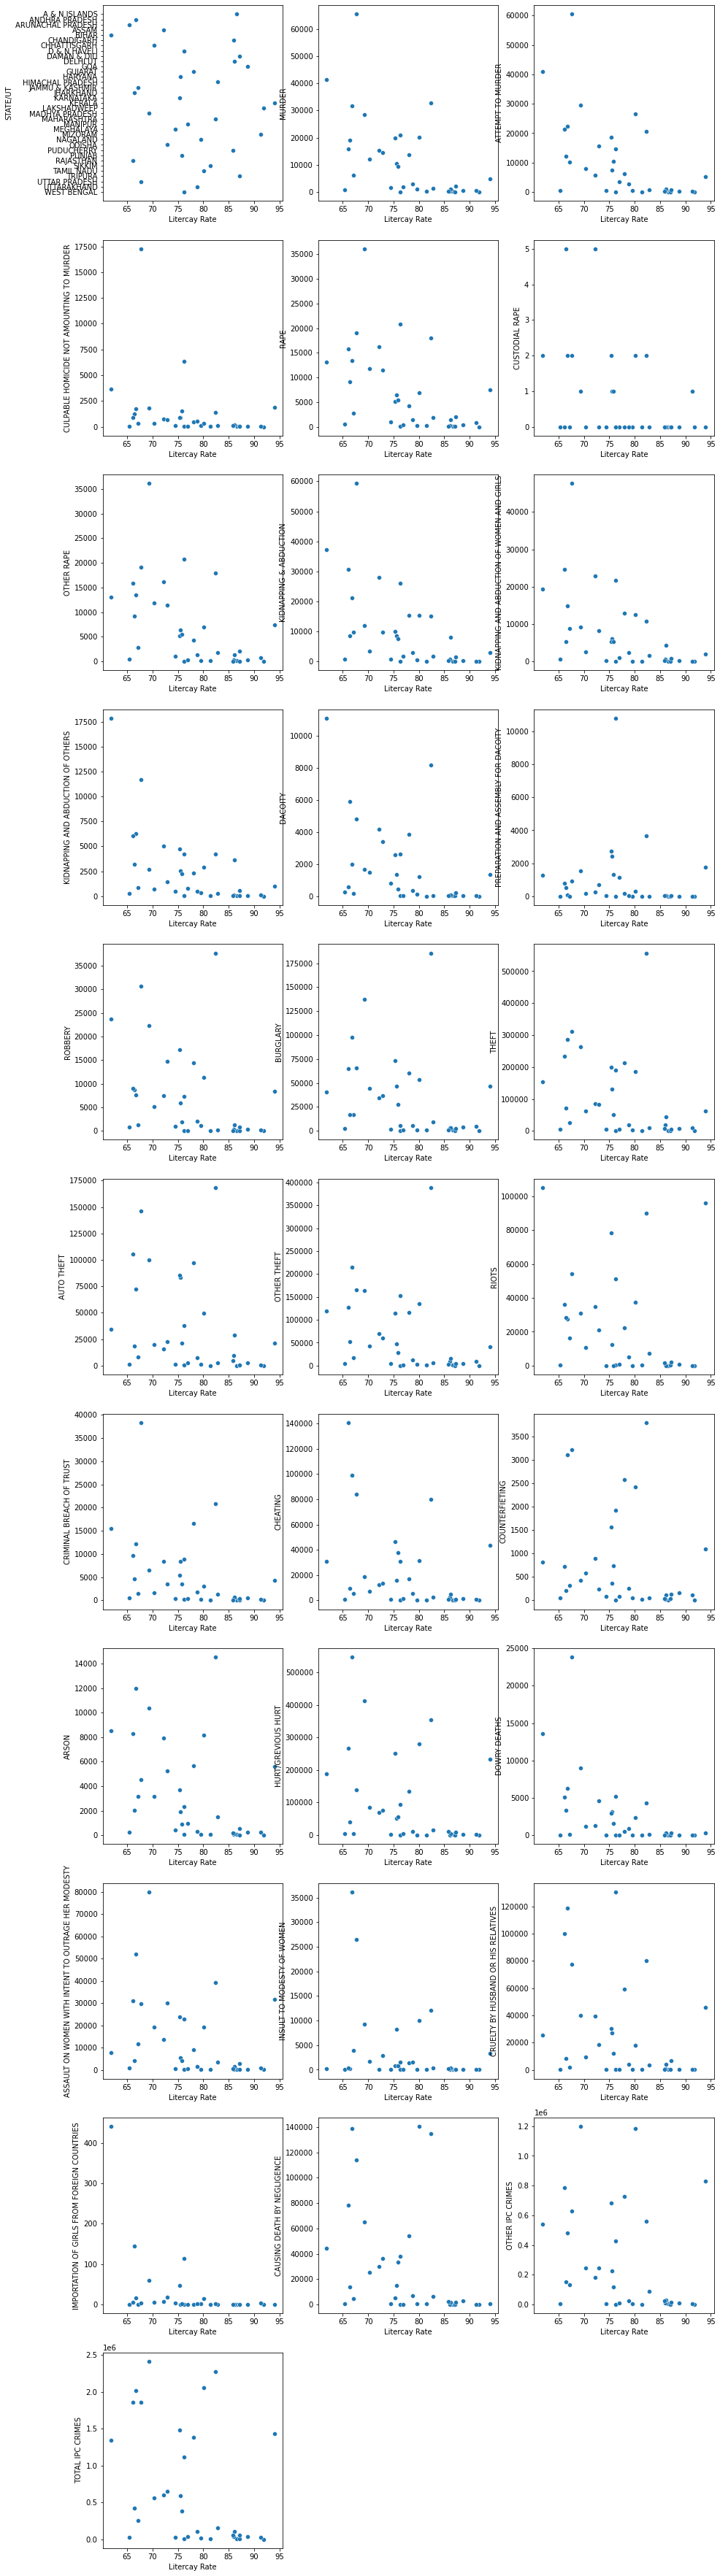

'\nOBSERVATION:\nIn maximum type of crime having inverse relationship with Literacy Rate.\nOther Ipc Crime and Litercy rate not having raltionship between each others.same thing in cruelty by husband or relative.\n'

In [23]:
# finding relation ship between commited crime type and Literacy rate
'''every Crime Type  VS Literacy Rate'''
plt.figure(figsize=(15,70))
plotnumber = 1
for i in total_crime_by_state:
    if plotnumber<=36:
        ax = plt.subplot(12,3,plotnumber)
        sns.scatterplot(x = state_info['Literacy rate'],y = total_crime_by_state[i])
        plt.xlabel('Litercay Rate')
    plotnumber += 1
    
plt.show()

'''
OBSERVATION:
In maximum type of crime having inverse relationship with Literacy Rate.
Other Ipc Crime and Litercy rate not having raltionship between each others.same thing in cruelty by husband or relative.
'''

In [24]:
total_crime_by_state.head()

STATE/UT  MURDER  ATTEMPT TO MURDER  \
0      A & N ISLANDS     160                 65   
1     ANDHRA PRADESH   31756              22420   
2  ARUNACHAL PRADESH     841                417   
3              ASSAM   15432               5662   
4              BIHAR   41245              40919   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  CUSTODIAL RAPE  \
0                                         21    109               0   
1                                       1763  13479               2   
2                                         36    500               0   
3                                        718  16178               5   
4                                       3672  13124               2   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0         109                      94   
1       13477                   21239   
2         500                     857   
3       16173                   27939   
4       13122                   37220   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                           77   
1                                        14936   
2                                          558   
3                                        22920   
4                                        19389   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                  17       15   
1                                6303     1987   
2                                 299      260   
3                                5019     4170   
4                               17831    11099   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY   THEFT  \
0                                     0       74       892    1124   
1                                    80     7605     97336  287190   
2                                     4      843      2780    5178   
3                                   253     7467     34752   85475   
4                                  1265    23666     40293  153372   

   AUTO THEFT  OTHER THEFT   RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  \
0          85         1039     140                        72       253   
1       72644       214546   27459                     12128     98843   
2        1076         4102     340                       505       520   
3       15479        69996   34963                      8402     12391   
4       34221       119151  105096                     15528     30690   

   COUNTERFIETING  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0              11     98                1105             6   
1            3107  11968              546565          6215   
2              52    250                5157             2   
3             898   7918               69183          1276   
4             826   8509              189266         13548   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                214     
1                                              51999     
2                                                784     
3                                              13620     
4                                               7576     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          43                                  121   
1                       36131                               119007   
2                          18                                  167   
3                         112                                39388   
4                         226                                25680   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                           42   
1                                           17                       138435   
2                                            0                          745   
3                                            8                        30205   
4                        

In [25]:
'''Total crime commited between 2001 to 2012'''
'''Total Crime by Year'''
grp_by_Year = total_dict_crime.groupby('YEAR')
grp_by_Year_sum = grp_by_Year.sum()
total_crime_by_Year = grp_by_Year_sum.drop(['DISTRICT','STATE/UT'],axis=1)
total_crime_by_Year.reset_index(inplace=True)
total_crime_by_Year.head()

YEAR  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0  2001   35655              31013                                       3304   
1  2002   34759              29940                                       3556   
2  2003   32231              25535                                       3964   
3  2004   33127              27371                                       3855   
4  2005   32264              27564                                       3514   

    RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0  15694               0       15694                   20860   
1  15970               3       15967                   20527   
2  15357               1       15356                   18836   
3  17682               2       17680                   22118   
4  17701               7       17694                   21242   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                        13681   
1                                        13613   
2                                        12499   
3                                        14697   
4                                        14644   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                7179     6106   
1                                6914     6054   
2                                6337     5275   
3                                7421     5281   
4                                6598     5114   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY   THEFT  \
0                                  1540    19277     98153  233527   
1                                  1774    18262     94101  230837   
2                                  2195    17071     90929  229693   
3                                  2205    17997     90615  254051   
4                                  2677    17163     88015  255156   

   AUTO THEFT  OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  \
0       55819       177708  76057                     14319     42544   
1       59234       171603  68806                     13583     44173   
2       61862       167831  57254                     13001     45399   
3       71809       182242  59904                     13731     49617   
4       76847       178309  56174                     13178     51247   

   COUNTERFIETING  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0            1641  10484              269476          6738   
1            1476  11763              263174          6687   
2            2012   9305              259736          6078   
3            1485   8599              275088          6900   
4            2347   8404              269047          6673   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                              33622     
1                                              33497     
2                                              32450     
3                                              33966     
4                                              33413     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                        9656                                49032   
1                       10027                                49102   
2                       12220                                49492   
3                        9871                                56867   
4                        9759                                56995   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                          114                        56750   
1                                           76                        63628   
2                                           46                        60270   
3                                           89                        68990   
4                                          148                        71064   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0          

In [26]:
total_crime_by_Year.shape

(12, 31)

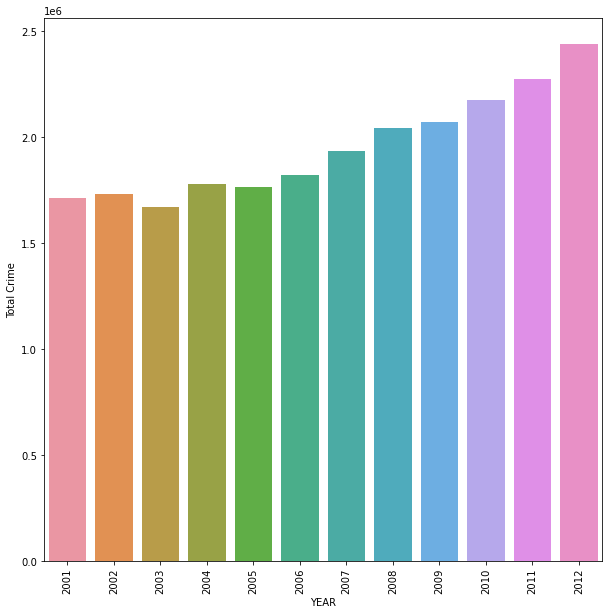

' Crime is increased year by year'

In [27]:
'''Total Crime By Year'''
plt.figure(figsize=(10,10))
sns.barplot( x=total_crime_by_Year['YEAR'], y = total_crime_by_Year['TOTAL IPC CRIMES'])
plt.ylabel("Total Crime")
plt.xticks(rotation = 90)
plt.show()

''' Crime is increased year by year'''

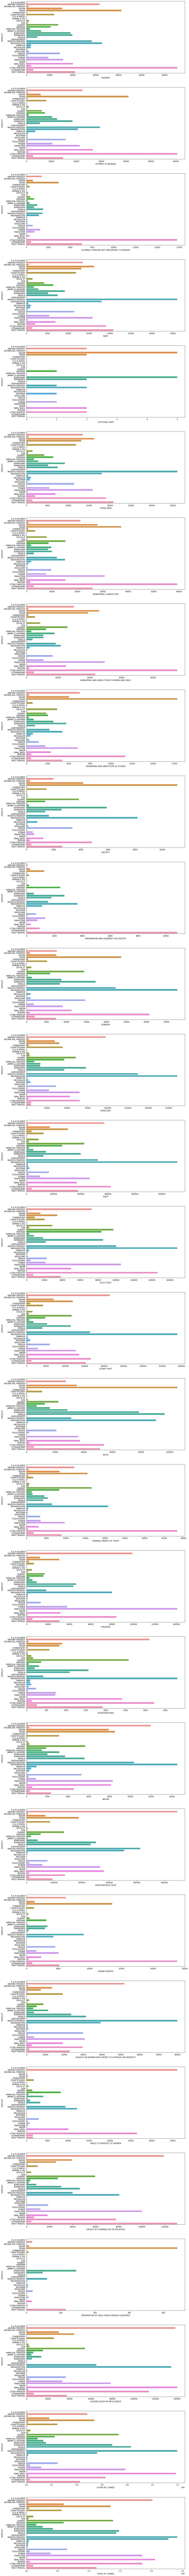

'\nOBSERVATION\n\n1. Murder, Attempt to murder and Culpable homicide not amounting to murder in this type of crime mximum time commited in UttarPradesh \nBihar and Maharashtra respectively.\n2. MadhyaPradesh is the state with highest number of Rape, other Rape and custodial rape cases reported in india.followed by bihar \nand west bengal.\n3. UttarPradesh, Bihar and assam this state recorded highest numbers kidnapping and abduction crimes commited respectively.\n4. Bihar has recorded the highest number of dacoity crimes, followed by Maharashtra and Jharkhand.\n5. Maharashtra has recorded highest numbers of cases of robbery crimes in india followed by UttarPradesh and Bihar.\n6. Maharashtra, MP, and Andhra Pradesh have respectively recorded the highest numbers of burglary crimes committed.same for Theft\nCrime.\n7. Maharshtra have highest numbers of auto Theft crimes.followed by Utttar Pradesh.\n8. more than 100000 autotheft crime cases reported gujarat,Madhyapradesh and rajastan.\n9. R

In [28]:
'''Type of Crime VS Each State'''
plt.figure(figsize=(15,300))
plotnumber = 1
for i in total_crime_by_state.drop('STATE/UT',axis=1):
    if plotnumber<=36:
        ax = plt.subplot(36,1,plotnumber)
        sns.barplot(y = total_crime_by_state['STATE/UT'],x = total_crime_by_state[i])
    plotnumber += 1
    
plt.show()

'''
OBSERVATION

1. Murder, Attempt to murder and Culpable homicide not amounting to murder in this type of crime mximum time commited in UttarPradesh 
Bihar and Maharashtra respectively.
2. MadhyaPradesh is the state with highest number of Rape, other Rape and custodial rape cases reported in india.followed by bihar 
and west bengal.
3. UttarPradesh, Bihar and assam this state recorded highest numbers kidnapping and abduction crimes commited respectively.
4. Bihar has recorded the highest number of dacoity crimes, followed by Maharashtra and Jharkhand.
5. Maharashtra has recorded highest numbers of cases of robbery crimes in india followed by UttarPradesh and Bihar.
6. Maharashtra, MP, and Andhra Pradesh have respectively recorded the highest numbers of burglary crimes committed.same for Theft
Crime.
7. Maharshtra have highest numbers of auto Theft crimes.followed by Utttar Pradesh.
8. more than 100000 autotheft crime cases reported gujarat,Madhyapradesh and rajastan.
9. Rajasthan, Andhra Pradesh, and Uttar Pradesh are the states in India with the highest number of cheating crimes.
10. Maharashtra is highest in couterfieting and arson crime.
11. The state of Madhya Pradesh has the highest number of Hurt/Grevious Hurt crimes recorded.
12. Uttar Pradesh, Bihar, and Madhya Pradesh have reported the highest number of cases related to dowry deaths.
13. Madhya Pradesh and Andhra has most Assault on women with intent to outrage her modesty.
14. andhra have highest numbers of insult to modesty of women and second highest in cruelty by husband or his relatives crime.
15. Tamilnadu have highest number of causing death by neligence crime

''' 

In [29]:
'''OBSERVATION For ABOVE Graph'''
for i in total_crime_by_state.drop('STATE/UT',axis=1):
    print(i)
    print('top 3 state In each Crime type')
    print(total_crime_by_state[['STATE/UT',i]].sort_values(i,ascending=False).head(3))
    print('*-*'*20)

MURDER
top 3 state In each Crime type
         STATE/UT  MURDER
32  UTTAR PRADESH   65443
4           BIHAR   41245
20    MAHARASHTRA   32767
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
ATTEMPT TO MURDER
top 3 state In each Crime type
          STATE/UT  ATTEMPT TO MURDER
32   UTTAR PRADESH              60520
4            BIHAR              40919
19  MADHYA PRADESH              29458
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER
top 3 state In each Crime type
         STATE/UT  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER
32  UTTAR PRADESH                                      17266
34    WEST BENGAL                                       6333
4           BIHAR                                       3672
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
RAPE
top 3 state In each Crime type
          STATE/UT   RAPE
19  MADHYA PRADESH  36087
34     WEST BENGAL  20787
32   UTTAR PRADESH  19058
*-**-**-**-**-**-

In [30]:
state_wise_crime = total_crime_by_state.drop('TOTAL IPC CRIMES',axis=1).transpose().reset_index()
state_wise_crime.columns = state_wise_crime.iloc[0]
state_wise_crime = state_wise_crime[1:]
state_wise_crime.reset_index(inplace=True)
state_wise_crime.drop('index',axis=1,inplace=True)
state_wise_crime.head()

0                                   STATE/UT A & N ISLANDS ANDHRA PRADESH  \
0                                     MURDER           160          31756   
1                          ATTEMPT TO MURDER            65          22420   
2  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            21           1763   
3                                       RAPE           109          13479   
4                             CUSTODIAL RAPE             0              2   

0 ARUNACHAL PRADESH  ASSAM  BIHAR CHANDIGARH CHHATTISGARH D & N HAVELI  \
0               841  15432  41245        243        12060          108   
1               417   5662  40919        301         7910           31   
2                36    718   3672         79          348            3   
3               500  16178  13124        281        11838           56   
4                 0      5      2          0            0            0   

0 DAMAN & DIU DELHI UT  GOA GUJARAT HARYANA HIMACHAL PRADESH JAMMU & KASHMIR  \
0          68     1042  487   13775   10471             1454            6304   
1          38      878  269    6112    7434              835           10303   
2           2      164   67     430     857              130             347   
3          20     1412  350    4249    6410             1804            2810   
4           0        0    0       0       1                0               0   

0 JHARKHAND KARNATAKA KERALA LAKSHADWEEP MADHYA PRADESH MAHARASHTRA MANIPUR  \
0     19060     19937   4733           3          28399       32767    1955   
1     12270     18512   5327           6          29458       20589    3536   
2      1231       857   1897           0           1834        1409      42   
3      9159      5174   7447           7          36087       17986     387   
4         5         2      0           0              1           2       0   

0 MEGHALAYA MIZORAM NAGALAND ODISHA PUDUCHERRY PUNJAB RAJASTHAN SIKKIM  \
0      1730     403     1038  14453        357   9493     15844    166   
1       601     258      464  15652        343  10397     21342    111   
2        84      67      101    698         78   1558       889     38   
3      1020     826      220  11430         77   5459     15798    195   
4         0       1        0      0          0      1         0      0   

0 TAMIL NADU TRIPURA UTTAR PRADESH UTTARAKHAND WEST BENGAL  
0      20127    2022         65443        2948       21056  
1      26597     681         60520        2627       14693  
2        343      19         17266         514        6333  
3       6952    2058         19058        1378       20787  
4          2       0             2           0           0

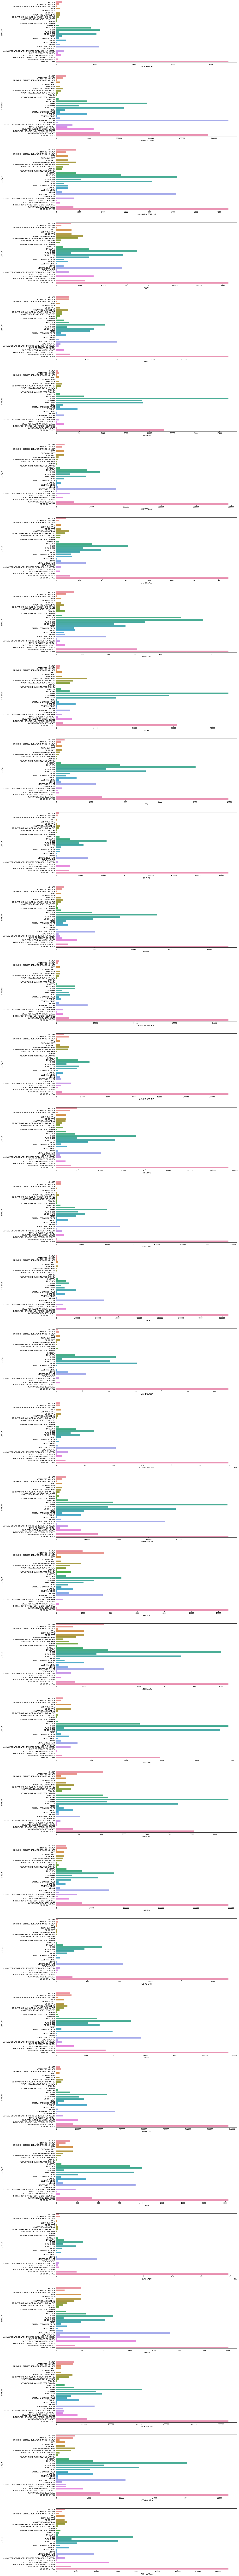

In [31]:
plt.figure(figsize=(20,300))
plotnumber = 1
for i in state_wise_crime.drop('STATE/UT',axis=1):
    if plotnumber<=36:
        ax = plt.subplot(36,1,plotnumber)
        sns.barplot(x =state_wise_crime[i],y= state_wise_crime['STATE/UT'])
    plotnumber += 1
    
plt.show()


In [32]:
'''OBSERVATION For ABOVE Graph'''
for i in state_wise_crime.drop('STATE/UT',axis=1):
    print(i)
    print('Highest Crime commited in each state')
    print(state_wise_crime[['STATE/UT',i]].sort_values(i,ascending=False).head(3))
    print('*-*'*20)

A & N ISLANDS
Highest Crime commited in each state
0             STATE/UT A & N ISLANDS
28    OTHER IPC CRIMES          4443
13               THEFT          1124
21  HURT/GREVIOUS HURT          1105
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
ANDHRA PRADESH
Highest Crime commited in each state
0             STATE/UT ANDHRA PRADESH
21  HURT/GREVIOUS HURT         546565
28    OTHER IPC CRIMES         482252
13               THEFT         287190
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
ARUNACHAL PRADESH
Highest Crime commited in each state
0             STATE/UT ARUNACHAL PRADESH
28    OTHER IPC CRIMES              7396
13               THEFT              5178
21  HURT/GREVIOUS HURT              5157
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
ASSAM
Highest Crime commited in each state
0           STATE/UT   ASSAM
28  OTHER IPC CRIMES  181354
13             THEFT   85475
15       OTHER THEFT   69996
*-**-**-**-**-**-**-**-**-**-**-**-*

In [33]:
'''OBSERVATION For ABOVE Graph'''
for i in state_wise_crime.drop('STATE/UT',axis=1):
    print(i)
    print('lowest Crime commited in each state')
    print(state_wise_crime[['STATE/UT',i]].sort_values(i,ascending=True).head(3))
    print('*-*'*20)

A & N ISLANDS
lowest Crime commited in each state
0                                      STATE/UT A & N ISLANDS
10         PREPARATION AND ASSEMBLY FOR DACOITY             0
4                                CUSTODIAL RAPE             0
26  IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES             0
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
ANDHRA PRADESH
lowest Crime commited in each state
0                                      STATE/UT ANDHRA PRADESH
4                                CUSTODIAL RAPE              2
26  IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES             17
10         PREPARATION AND ASSEMBLY FOR DACOITY             80
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
ARUNACHAL PRADESH
lowest Crime commited in each state
0                                      STATE/UT ARUNACHAL PRADESH
26  IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES                 0
4                                CUSTODIAL RAPE                 0
22                       

## 2.3 Analysis of year-on-year total crime rate

In [34]:
'''Crime rate Year by Year'''
'''source = https://www.macrotrends.net/countries/IND/india/crime-rate-statistics'''

crime_rate = pd.read_excel('Crime rate.xlsx')
crime_rate = crime_rate.sort_values("Year").reset_index()

In [35]:
crime_rate.drop('index',axis=1,inplace=True)

In [36]:
crime_rate

Year  Crime Rate  Chane in Crime rate
0   2001        4.32              -0.0528
1   2002        4.18              -0.0312
2   2003        3.99              -0.0466
3   2004        4.12               0.0319
4   2005        3.93              -0.0452
5   2006        3.86              -0.0183
6   2007        3.83              -0.0062
7   2008        3.83              -0.0007
8   2009        3.76              -0.0177
9   2010        3.76               0.0003
10  2011        3.81               0.0123
11  2012        3.75              -0.0156

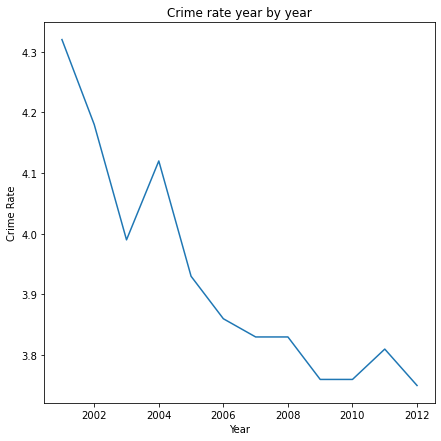

'Crime rate is decreasing year by year form 2001 to 2012'

In [37]:
plt.figure(figsize=(7,7))
sns.lineplot(x= crime_rate['Year'],y=crime_rate['Crime Rate'])
plt.title("Crime rate year by year")
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.show()

#observation
'''Crime rate is decreasing year by year form 2001 to 2012'''

In [38]:
crime_rate["Total Crime"] = total_crime_by_Year['TOTAL IPC CRIMES']

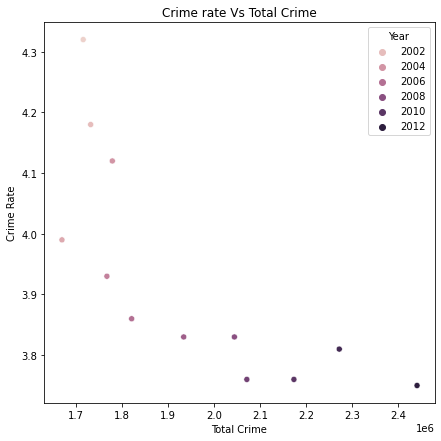

'Observation\nThere exists an inverse relationship between the total crimes committed and the crime rate.\nThe inverse relationship between the total crimes committed and crime rate may be impacted by population expansion.\nAs the population increases, crimes may also increase, but if the increase in crimes is less than the increase in \npopulation, crime rates may still decrease.\n'

In [39]:
plt.figure(figsize=(7,7))
sns.scatterplot(y= crime_rate['Crime Rate'],x=crime_rate['Total Crime'],hue=crime_rate['Year'])
plt.title("Crime rate Vs Total Crime")
plt.ylabel('Crime Rate')
plt.xlabel('Total Crime')
plt.show()

'''Observation
There exists an inverse relationship between the total crimes committed and the crime rate.
The inverse relationship between the total crimes committed and crime rate may be impacted by population expansion.
As the population increases, crimes may also increase, but if the increase in crimes is less than the increase in 
population, crime rates may still decrease.
'''

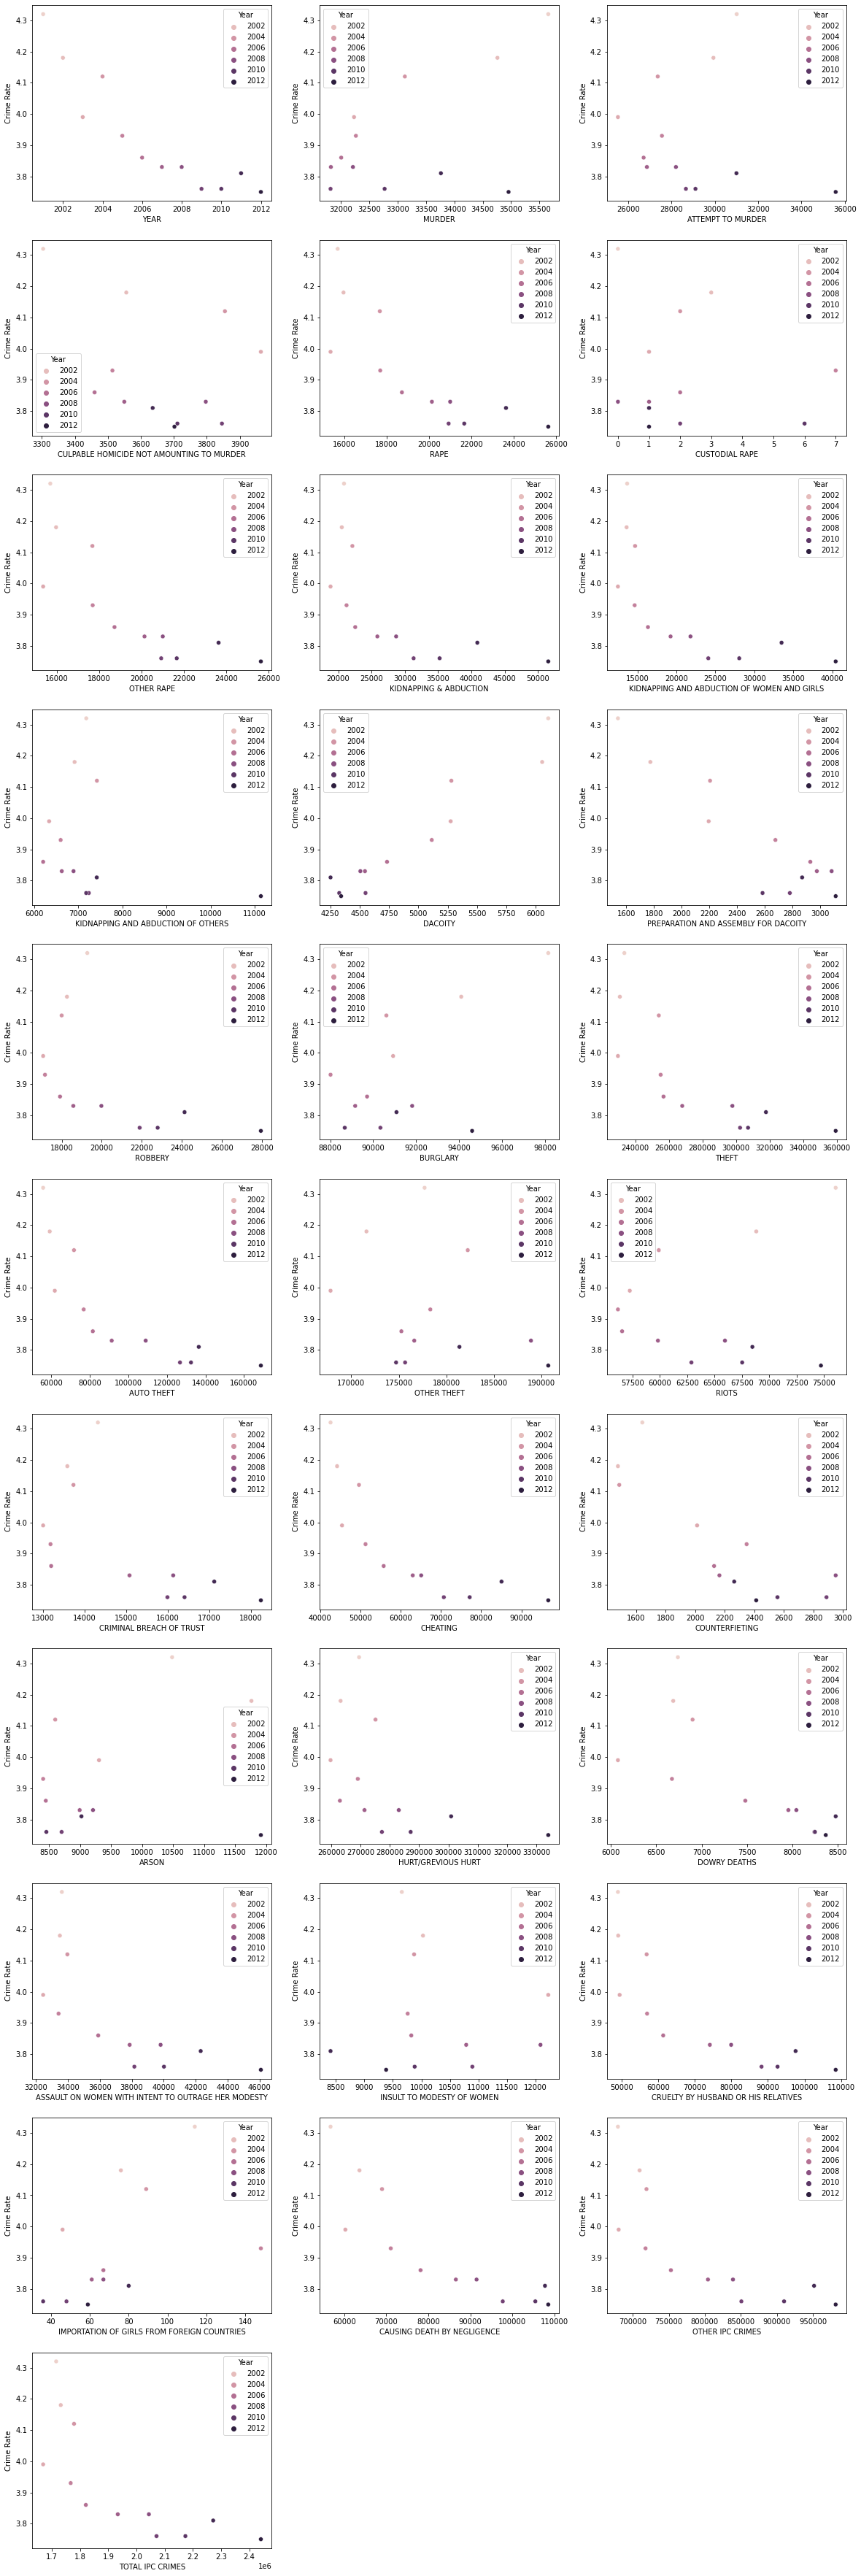

'Observation\nThe inverse relationship between the total crimes committed and the crime \nrate may be due to the impact of population expansion. As the population \nincreases, the number of crimes committed may also increase. However, if the \nincrease in crimes is less than the increase in population, the crime rate \nmay still decrease.\n'

In [40]:
'''Type of crime by Every Year'''
plt.figure(figsize=(20,70))
plotnumber = 1
for i in total_crime_by_Year:
    if plotnumber<=36:
        ax = plt.subplot(12,3,plotnumber)
        sns.scatterplot(y =crime_rate['Crime Rate'] ,x = total_crime_by_Year[i],hue=crime_rate['Year'])
        
    plotnumber += 1
    
plt.show()

'''Observation
The inverse relationship between the total crimes committed and the crime 
rate may be due to the impact of population expansion. As the population 
increases, the number of crimes committed may also increase. However, if the 
increase in crimes is less than the increase in population, the crime rate 
may still decrease.
'''

## 2.4 Analysis of area vs overall crime

In [41]:
state_info['Total Crime'] = total_crime_by_state['TOTAL IPC CRIMES']
state_info.head()

State name  population  Literate population  Literacy rate  \
0  Andaman & Nicobar Islands      380581               294281          86.63   
1             Andhra Pradesh   119774755             73974832          66.78   
2          Arunachal Pradesh     1383727               766005          65.38   
3                      Assam    31205576             19177977          72.19   
4                      Bihar   104099452             52504553          61.80   

   area in square km  Unemployment rate in rural  Unemployment rate in urban  \
0               8249                         5.4                         8.6   
1             171482                         1.2                         4.3   
2              83743                         1.7                         4.8   
3              78438                         4.5                         5.6   
4              94163                         3.2                         5.6   

   Total Crime  
0         9102  
1      2018981  
2        27652  
3       597764  
4      1346293

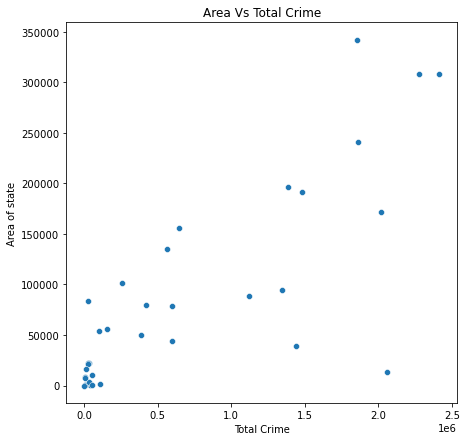

'Observation\nthere is area of state increase aslo total crime increase thas mean there is \npositive relation ship between area and total crime'

In [42]:
plt.figure(figsize=(7,7))
sns.scatterplot(y= state_info['area in square km'],x=state_info['Total Crime'])
plt.title("Area Vs Total Crime")
plt.ylabel('Area of state')
plt.xlabel('Total Crime')
plt.show()

'''Observation
there is area of state increase aslo total crime increase thas mean there is 
positive relation ship between area and total crime'''

In [43]:
crime_by_place = pd.read_csv('17_Crime_by_place_of_occurrence_2001_2012.csv')
crime_by_place

STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0       ANDHRA PRADESH  2001                             100   
1    ARUNACHAL PRADESH  2001                               9   
2                ASSAM  2001                             381   
3                BIHAR  2001                             818   
4         CHHATTISGARH  2001                              54   
..                 ...   ...                             ...   
451              DELHI  2012                              10   
452        LAKSHADWEEP  2012                               0   
453         PUDUCHERRY  2012                               1   
454        TOTAL (UTs)  2012                              11   
455  TOTAL (ALL-INDIA)  2012                            1288   

     RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0                               177                             5158   
1                                26                               99   
2                               191                             1695   
3                               326                             2486   
4                                42                             3336   
..                              ...                              ...   
451                             101                             1249   
452                               0                                3   
453                               4                               47   
454                             123                             1515   
455                            2821                            60698   

     RESIDENTIAL PREMISES - Theft  HIGHWAYS - Dacoity  HIGHWAYS - Robbery  \
0                            4257                  57                 172   
1                             131                   0                   0   
2                            2901                  46                 136   
3                            4741                 162                 826   
4                            1417                  10                  38   
..                            ...                 ...                 ...   
451                          7076                   1                  32   
452                             7                   0                   0   
453                            42                   0                   0   
454                          7974                   1                  32   
455                         81861                 838                5000   

     HIGHWAYS - Burglary  HIGHWAYS - Theft  RIVER and SEA - Dacoity  \
0                     31                74                        2   
1                      0                 8                        0   
2                      7                87                        1   
3                      0               257                        1   
4                     12                72                        0   
..                   ...               ...                      ...   
451                    0               189                        0   
452                    0                 0                        0   
453                    0                 0                        0   
454                    0               199                        0   
455                  316             27802                        3   

     RIVER and SEA - Robbery  RIVER and SEA - Burglary  RIVER and SEA - Theft  \
0                         11                       101                    110   
1                          0                         0                      1   
2                          0                         0                      8   
3                          0                         0                      0   
4                          0                         0                      2   
..                       ...                       ...                    ...   
451                        0       

In [44]:
crime_by_place['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP',
       'PUDUCHERRY', 'TOTAL (UTs)', 'TOTAL (ALL-INDIA)'], dtype=object)

In [45]:
crime_by_place['STATE/UT'].value_counts()

DAMAN & DIU          13
ANDHRA PRADESH       12
TOTAL (STATES)       12
RAJASTHAN            12
SIKKIM               12
TAMIL NADU           12
UTTAR PRADESH        12
UTTARAKHAND          12
WEST BENGAL          12
A & N ISLANDS        12
ARUNACHAL PRADESH    12
CHANDIGARH           12
D & N HAVELI         12
DELHI                12
LAKSHADWEEP          12
PUDUCHERRY           12
TOTAL (UTs)          12
PUNJAB               12
ODISHA               12
NAGALAND             12
JAMMU & KASHMIR      12
ASSAM                12
BIHAR                12
CHHATTISGARH         12
GOA                  12
GUJARAT              12
HARYANA              12
HIMACHAL PRADESH     12
JHARKHAND            12
MIZORAM              12
KARNATAKA            12
KERALA               12
MADHYA PRADESH       12
MAHARASHTRA          12
MANIPUR              12
MEGHALAYA            12
TOTAL (ALL-INDIA)    12
TRIPURA              11
Name: STATE/UT, dtype: int64

In [46]:

index_Total = np.where(crime_by_place['STATE/UT']=='TOTAL (ALL-INDIA)')

index_ut = np.where(crime_by_place['STATE/UT']=='TOTAL (UTs)')

index_state = np.where(crime_by_place['STATE/UT']=='TOTAL (STATES)')

In [47]:
new_crime_by_place = crime_by_place
for i in [index_state,index_Total,index_ut]:
    for j in i:
        new_crime_by_place = new_crime_by_place.drop(j,axis=0)

In [48]:
new_crime_by_place

STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0       ANDHRA PRADESH  2001                             100   
1    ARUNACHAL PRADESH  2001                               9   
2                ASSAM  2001                             381   
3                BIHAR  2001                             818   
4         CHHATTISGARH  2001                              54   
..                 ...   ...                             ...   
449       D & N HAVELI  2012                               0   
450        DAMAN & DIU  2012                               0   
451              DELHI  2012                              10   
452        LAKSHADWEEP  2012                               0   
453         PUDUCHERRY  2012                               1   

     RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0                               177                             5158   
1                                26                               99   
2                               191                             1695   
3                               326                             2486   
4                                42                             3336   
..                              ...                              ...   
449                               0                                8   
450                               1                               12   
451                             101                             1249   
452                               0                                3   
453                               4                               47   

     RESIDENTIAL PREMISES - Theft  HIGHWAYS - Dacoity  HIGHWAYS - Robbery  \
0                            4257                  57                 172   
1                             131                   0                   0   
2                            2901                  46                 136   
3                            4741                 162                 826   
4                            1417                  10                  38   
..                            ...                 ...                 ...   
449                            19                   0                   0   
450                             4                   0                   0   
451                          7076                   1                  32   
452                             7                   0                   0   
453                            42                   0                   0   

     HIGHWAYS - Burglary  HIGHWAYS - Theft  RIVER and SEA - Dacoity  \
0                     31                74                        2   
1                      0                 8                        0   
2                      7                87                        1   
3                      0               257                        1   
4                     12                72                        0   
..                   ...               ...                      ...   
449                    0                10                        0   
450                    0                 0                        0   
451                    0               189                        0   
452                    0                 0                        0   
453                    0                 0                        0   

     RIVER and SEA - Robbery  RIVER and SEA - Burglary  RIVER and SEA - Theft  \
0                         11                       101                    110   
1                          0                         0                      1   
2                          0                         0                      8   
3                          0                         0                      0   
4                          0                         0                      2   
..                       ...                       ...                    ...   
449                        0       

In [49]:
grp_place_yrs = new_crime_by_place.groupby('YEAR')
grp_place_yrs_sum = grp_place_yrs.sum()
grp_place_yrs_sum = grp_place_yrs_sum.reset_index()

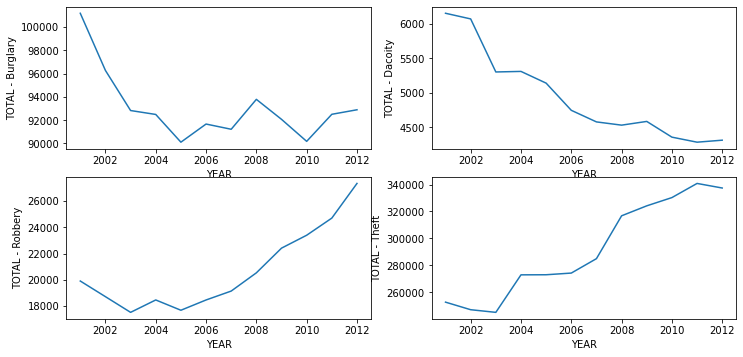

'Observation\ntotal burglary and dacaity crime derease constantly every year but there constat increase in Robbery and Theft Crimes\noverall area'

In [50]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4,2,1)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['TOTAL - Burglary'])

ax = plt.subplot(4,2,2)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['TOTAL - Dacoity'])

ax = plt.subplot(4,2,3)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['TOTAL - Robbery'])

ax = plt.subplot(4,2,4)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['TOTAL - Theft'])

plt.show()

'''Observation
total burglary and dacaity crime derease constantly every year but there constat increase in Robbery and Theft Crimes
overall area'''

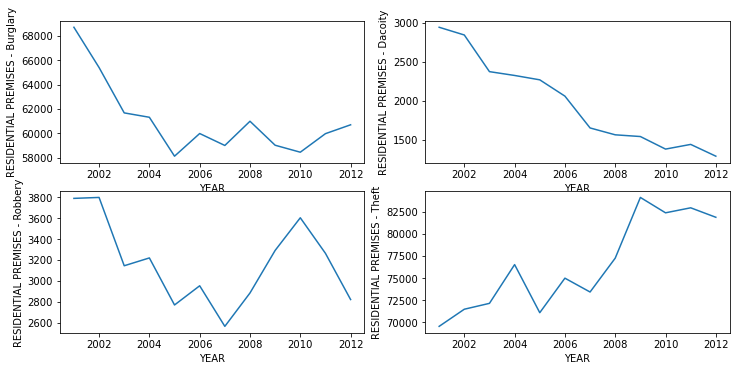

'Observation\nBurglary, robbery and dacoity crimes are decreased significantly decreased.\nRobbery crime line chart show that robbery is increasing fron 2007 to 2010 but after that very less robbery crime commited.\nTheft crime is Constantly increasing'

In [51]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4,2,1)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RESIDENTIAL PREMISES - Burglary'])

ax = plt.subplot(4,2,2)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RESIDENTIAL PREMISES - Dacoity'])

ax = plt.subplot(4,2,3)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RESIDENTIAL PREMISES - Robbery'])

ax = plt.subplot(4,2,4)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RESIDENTIAL PREMISES - Theft'])

plt.show()

'''Observation
Burglary, robbery and dacoity crimes are decreased significantly decreased.
Robbery crime line chart show that robbery is increasing fron 2007 to 2010 but after that very less robbery crime commited.
Theft crime is Constantly increasing'''

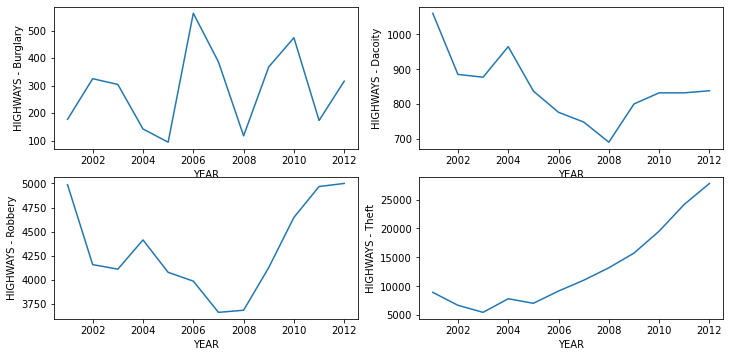

'Observation\nBurglary crime hit peak in 2006 in highway area as per burglary chrat after every 2 or 3 years later increase this crime\nDacoity is decreased form 2001 to 2008 and after that there constanly 800 to 900 case reported of dacoity crime\nrobbery crimes are drastically increased form 2008 in highways area\ntheft is constantly increased'

In [52]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4,2,1)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['HIGHWAYS - Burglary'])

ax = plt.subplot(4,2,2)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['HIGHWAYS - Dacoity'])

ax = plt.subplot(4,2,3)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['HIGHWAYS - Robbery'])

ax = plt.subplot(4,2,4)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['HIGHWAYS - Theft'])

plt.show()

'''Observation
Burglary crime hit peak in 2006 in highway area as per burglary chrat after every 2 or 3 years later increase this crime
Dacoity is decreased form 2001 to 2008 and after that there constanly 800 to 900 case reported of dacoity crime
robbery crimes are drastically increased form 2008 in highways area
theft is constantly increased'''

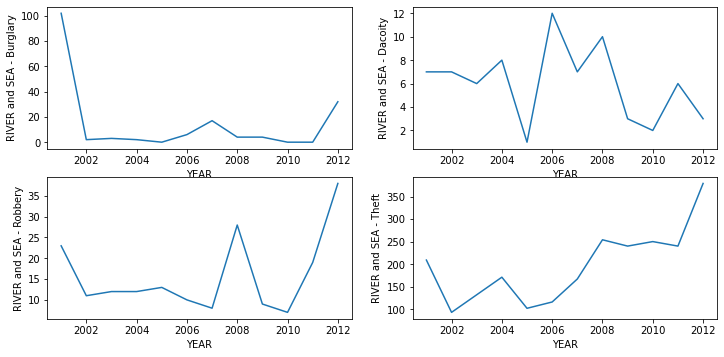

'Observation\nany fix pattern are not visible in burglary and dacoity crimes in rivery and sea area\nfrom 2006 theft crimes are incresed in river area'

In [53]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4,2,1)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RIVER and SEA - Burglary'])

ax = plt.subplot(4,2,2)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RIVER and SEA - Dacoity'])

ax = plt.subplot(4,2,3)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RIVER and SEA - Robbery'])

ax = plt.subplot(4,2,4)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RIVER and SEA - Theft'])

plt.show()

'''Observation
any fix pattern are not visible in burglary and dacoity crimes in rivery and sea area
from 2006 theft crimes are incresed in river area'''

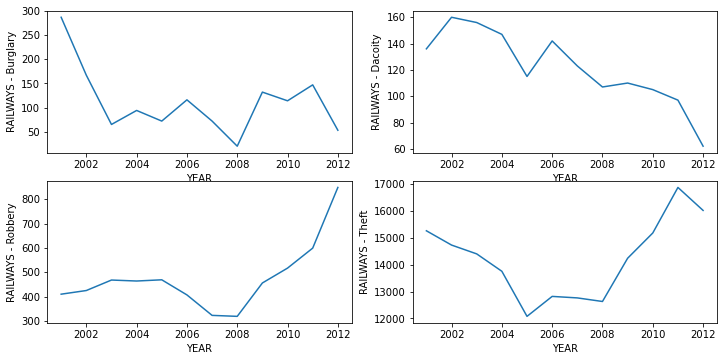

'Observation\nTheft is major crime in railways area form 2001 to 2005 theft crimes are decreasing but after that constantly increase \ntheft crimes'

In [54]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4,2,1)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RAILWAYS - Burglary'])

ax = plt.subplot(4,2,2)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RAILWAYS - Dacoity'])

ax = plt.subplot(4,2,3)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RAILWAYS - Robbery'])

ax = plt.subplot(4,2,4)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['RAILWAYS - Theft'])

plt.show()

'''Observation
Theft is major crime in railways area form 2001 to 2005 theft crimes are decreasing but after that constantly increase 
theft crimes'''

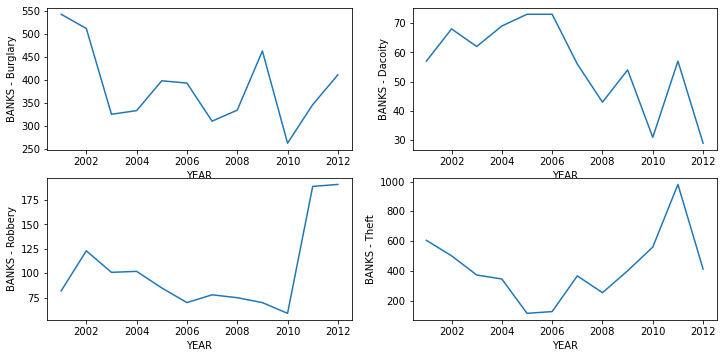

'Observation\nBurglary crimes are increased from 2010\ndacoity crime is decreased from 2001 to 2012\nbank robbery decreasing from 2001 to 2010 but after 2010 robbery crimes dramatically incresed.\nbank theft are decresing from 2010 before this year theft aslo incresing constantly.\n'

In [55]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4,2,1)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['BANKS - Burglary'])

ax = plt.subplot(4,2,2)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['BANKS - Dacoity'])

ax = plt.subplot(4,2,3)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['BANKS - Robbery'])

ax = plt.subplot(4,2,4)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['BANKS - Theft'])

plt.show()

'''Observation
Burglary crimes are increased from 2010
dacoity crime is decreased from 2001 to 2012
bank robbery decreasing from 2001 to 2010 but after 2010 robbery crimes dramatically incresed.
bank theft are decresing from 2010 before this year theft aslo incresing constantly.
'''

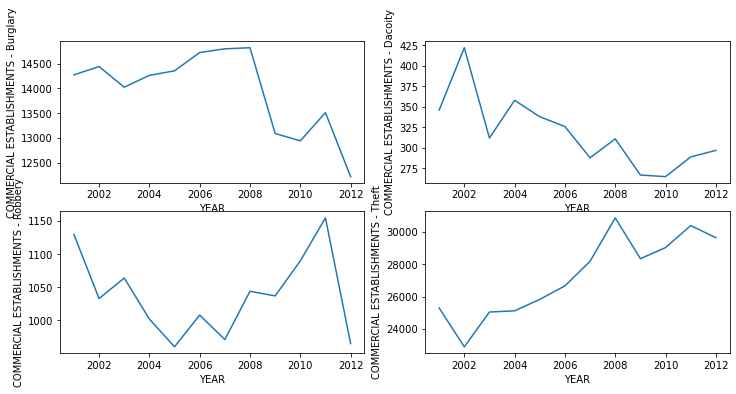

'Observation\nBurglary crime are incresing very slowly after 2008 burglary crime dropping very rapidly\ndacoity in commercial area deresing constantly\ntheft crime incresed every year in commercial area\n'

In [56]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4,2,1)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['COMMERCIAL ESTABLISHMENTS - Burglary'])

ax = plt.subplot(4,2,2)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['COMMERCIAL ESTABLISHMENTS - Dacoity'])

ax = plt.subplot(4,2,3)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['COMMERCIAL ESTABLISHMENTS - Robbery'])

ax = plt.subplot(4,2,4)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['COMMERCIAL ESTABLISHMENTS - Theft'])

plt.show()

'''Observation
Burglary crime are incresing very slowly after 2008 burglary crime dropping very rapidly
dacoity in commercial area deresing constantly
theft crime incresed every year in commercial area
'''

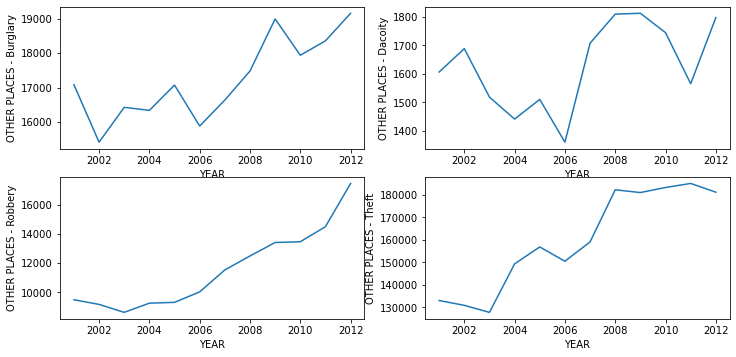

'Observation\nBurglary crime are constntly raising constantly\nDacoity crime are decresing from 2003 to 2006 in other area and from 2006 crimes are increasing very rapidly\nrobbery crime is incresing gradualy\ntheft crime in other areas incresing from 2001 to 2008 and after this year stright line reported crimes are same '

In [57]:
plt.figure(figsize=(12,12))
ax = plt.subplot(4,2,1)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['OTHER PLACES - Burglary'])

ax = plt.subplot(4,2,2)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['OTHER PLACES - Dacoity'])

ax = plt.subplot(4,2,3)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['OTHER PLACES - Robbery'])

ax = plt.subplot(4,2,4)
sns.lineplot(x=grp_place_yrs_sum['YEAR'],y=grp_place_yrs_sum['OTHER PLACES - Theft'])

plt.show()


'''Observation
Burglary crime are constntly raising constantly
Dacoity crime are decresing from 2003 to 2006 in other area and from 2006 crimes are increasing very rapidly
robbery crime is incresing gradualy
theft crime in other areas incresing from 2001 to 2008 and after this year stright line reported crimes are same '''

In [58]:
crime_place = grp_place_yrs_sum.transpose().reset_index()

In [59]:
crime_place['index'][0] = 'places'
crime_place.head()

index      0      1      2      3      4      5  \
0                           places   2001   2002   2003   2004   2005   2006   
1   RESIDENTIAL PREMISES - Dacoity   2941   2842   2372   2323   2267   2058   
2   RESIDENTIAL PREMISES - Robbery   3791   3800   3145   3220   2769   2953   
3  RESIDENTIAL PREMISES - Burglary  68716  65406  61677  61317  58118  59981   
4     RESIDENTIAL PREMISES - Theft  69551  71484  72147  76520  71093  74989   

       6      7      8      9     10     11  
0   2007   2008   2009   2010   2011   2012  
1   1650   1562   1540   1379   1439   1288  
2   2564   2884   3292   3605   3264   2821  
3  58999  60990  59018  58445  59970  60698  
4  73427  77250  84100  82365  82930  81861

In [60]:
crime_place.columns = crime_place.iloc[0]
crime_place = crime_place[1:]
crime_place.reset_index(inplace=True)

In [61]:
crime_place.head()

0  index                           places   2001   2002   2003   2004   2005  \
0      1   RESIDENTIAL PREMISES - Dacoity   2941   2842   2372   2323   2267   
1      2   RESIDENTIAL PREMISES - Robbery   3791   3800   3145   3220   2769   
2      3  RESIDENTIAL PREMISES - Burglary  68716  65406  61677  61317  58118   
3      4     RESIDENTIAL PREMISES - Theft  69551  71484  72147  76520  71093   
4      5               HIGHWAYS - Dacoity   1061    885    877    965    837   

0   2006   2007   2008   2009   2010   2011   2012  
0   2058   1650   1562   1540   1379   1439   1288  
1   2953   2564   2884   3292   3605   3264   2821  
2  59981  58999  60990  59018  58445  59970  60698  
3  74989  73427  77250  84100  82365  82930  81861  
4    776    748    690    800    832    832    838

In [62]:
crime_place.drop('index',axis=1,inplace=True)

In [63]:
crime_place.columns = ['places','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']

In [64]:
for i in range(2001,2013):
    crime_place[str(i)]=crime_place[str(i)].astype('int64')

In [65]:
total = crime_place.sum(axis=1)
crime_place['Total']=total

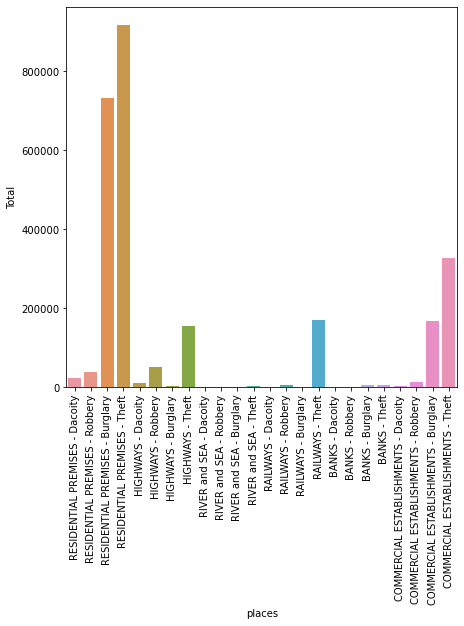

In [66]:
plt.figure(figsize=(7,7))
sns.barplot(x='places',y='Total',data=crime_place.iloc[:24])
plt.xticks(rotation=90)
plt.show()

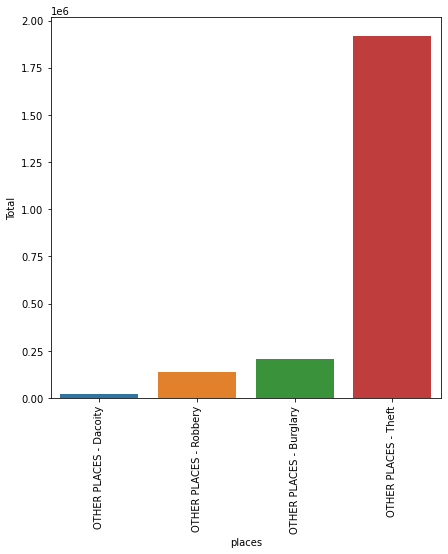

In [67]:
plt.figure(figsize=(7,7))
sns.barplot(x='places',y='Total',data=crime_place.iloc[24:28])
plt.xticks(rotation=90)
plt.show()

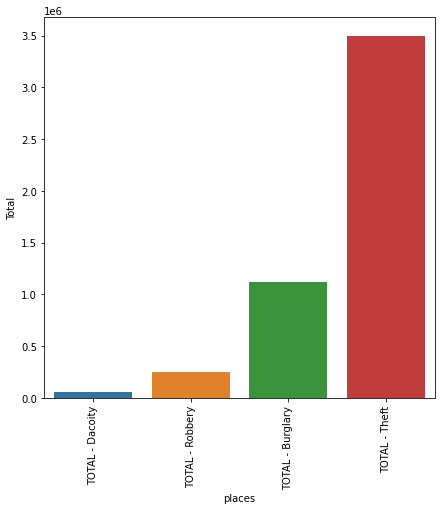

'Observation\nTheft is the most common crime in all area, according to all charts. Burglury is in number two.'

In [68]:
plt.figure(figsize=(7,7))
sns.barplot(x='places',y='Total',data=crime_place.iloc[28:])
plt.xticks(rotation=90)
plt.show()

'''Observation
Theft is the most common crime in all area, according to all charts. Burglury is in number two.'''

## 2.5 Analysis of population vs overall crime

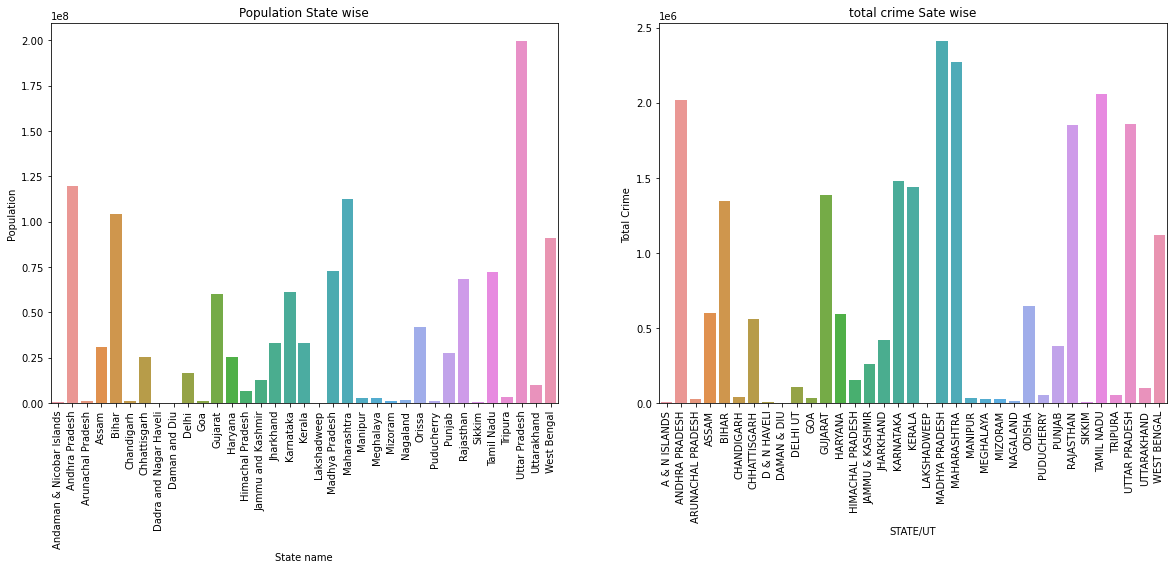

In [69]:
'''Total Crimes by State VS population of State'''

plt.figure(figsize=(20,7))

ax = plt.subplot(1,2,1)
sns.barplot(x=state_info['State name'],y= state_info['population'],data=state_info)
plt.ylabel("Population")
plt.title('Population State wise')
plt.xticks(rotation = 90)

ax = plt.subplot(1,2,2)
sns.barplot( x=total_crime_by_state['STATE/UT'], y = state_info['Total Crime'],data=state_info)
plt.ylabel("Total Crime ")
plt.title('total crime Sate wise')
plt.xticks(rotation = 90)

plt.show()

In [70]:
print('Top 5 Highly Populated states')
print(state_info[['State name','population']].sort_values('population',ascending=False).head())
print('\n')
print('Top 5 state as per Total Commited Crime')
print(state_info[['State name','Total Crime']].sort_values('Total Crime',ascending=False).head())

Top 5 Highly Populated states
        State name  population
32   Uttar Pradesh   199812341
1   Andhra Pradesh   119774755
20     Maharashtra   112374333
4            Bihar   104099452
34     West Bengal    91276115


Top 5 state as per Total Commited Crime
        State name  Total Crime
19  Madhya Pradesh      2413770
20     Maharashtra      2273436
30      Tamil Nadu      2060176
1   Andhra Pradesh      2018981
32   Uttar Pradesh      1858074


In [71]:
print('Top 5 Least Populated states')
print(state_info[['State name','population']].sort_values('population',ascending=True).head())
print('\n')
print('Bottom 5 state as per Total Commited Crime')
print(state_info[['State name','Total Crime']].sort_values('Total Crime',ascending=True).head())

Top 5 Least Populated states
                   State name  population
18                Lakshadweep       64473
8               Daman and Diu      243247
7      Dadra and Nagar Haveli      343709
0   Andaman & Nicobar Islands      380581
29                     Sikkim      610577


Bottom 5 state as per Total Commited Crime
                   State name  Total Crime
18                Lakshadweep          743
8               Daman and Diu         2948
7      Dadra and Nagar Haveli         4651
29                     Sikkim         7000
0   Andaman & Nicobar Islands         9102


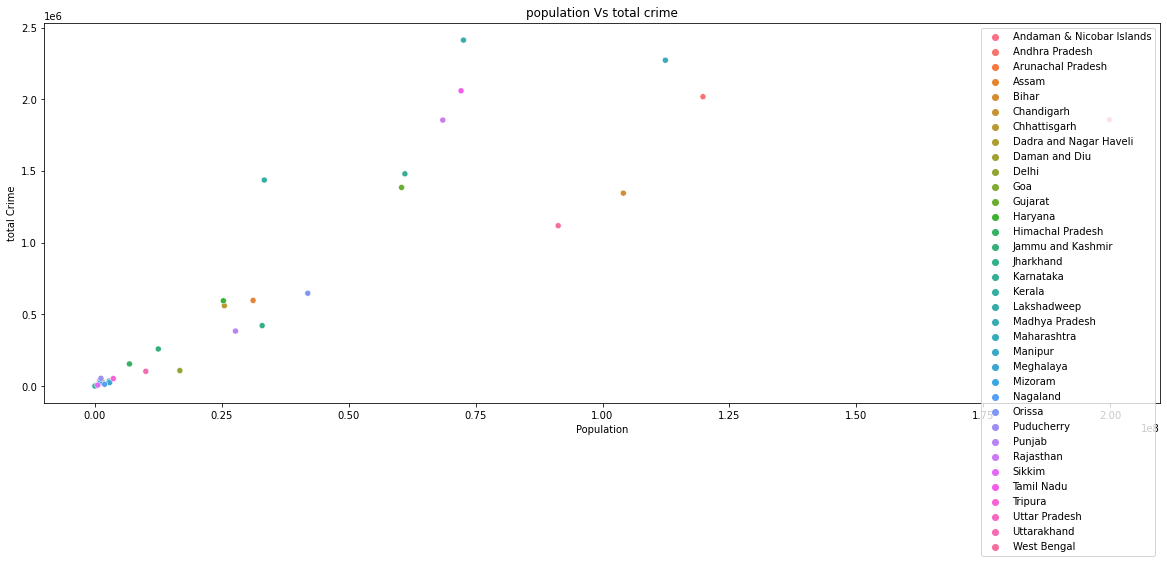

'As the population increases, there is a corresponding increase in the total crime.\n'

In [72]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='population',y='Total Crime',hue='State name',data=state_info)
plt.title("population Vs total crime")
plt.xlabel('Population')
plt.ylabel('total Crime')
plt.legend()
plt.show()

'''As the population increases, there is a corresponding increase in the total crime.
'''

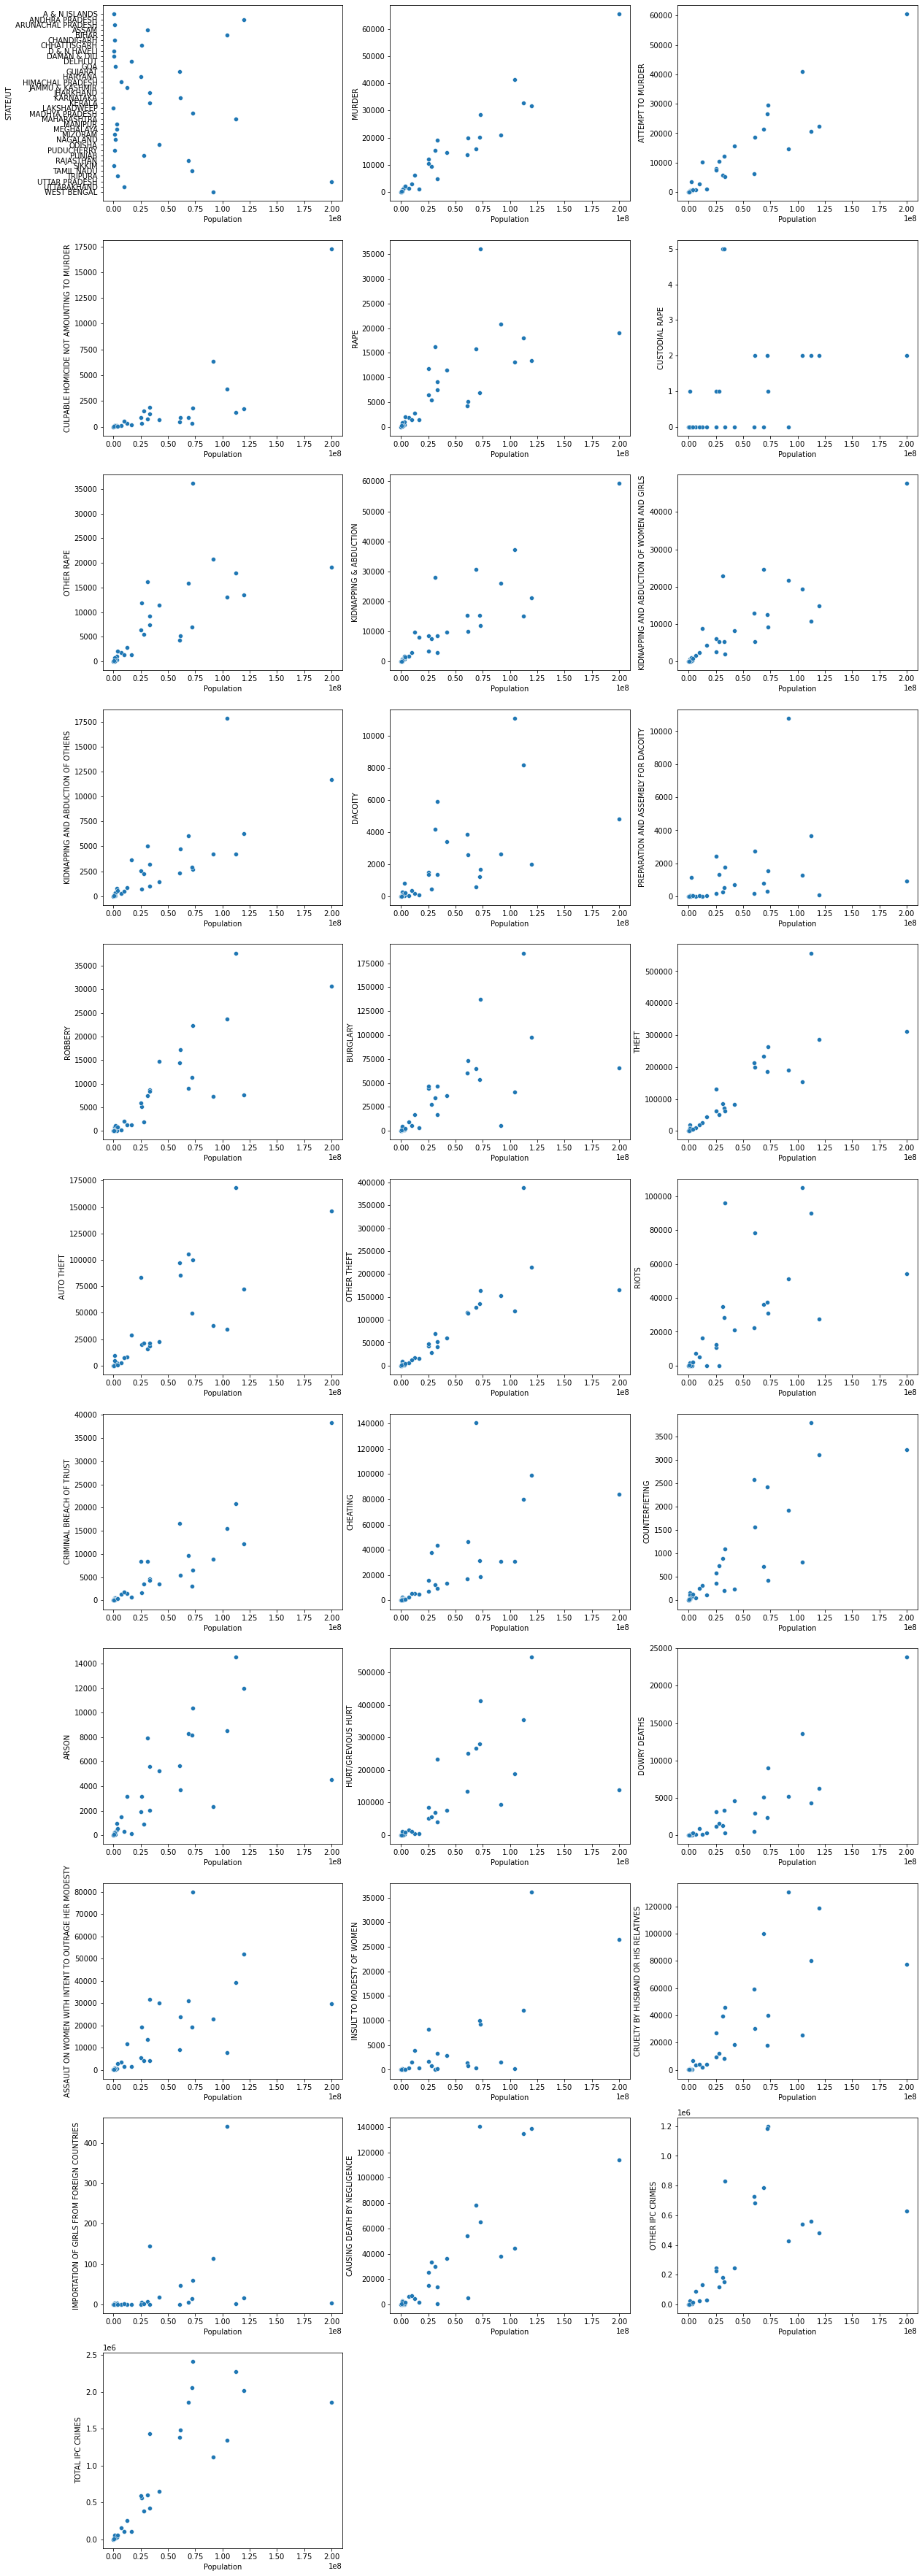

In [73]:
'''Type of crime by population'''
plt.figure(figsize=(20,70))
plotnumber = 1
for i in total_crime_by_state:
    if plotnumber<=36:
        ax = plt.subplot(12,3,plotnumber)
        sns.scatterplot(x =state_info['population'] ,y = total_crime_by_state[i])
        plt.xlabel('Population')
    plotnumber += 1
    
plt.show()

In [74]:
''' only 2001 and 2011 census is available, other year data is calculated on population groth rate'''

population_yrs= pd.read_excel('year wise population.xlsx')

In [75]:
population_yrs.drop('growth',axis=1,inplace=True)
population_yrs.head()

Year    Population
0  2001  1.028737e+09
1  2002  1.047255e+09
2  2003  1.065058e+09
3  2004  1.083164e+09
4  2005  1.100495e+09

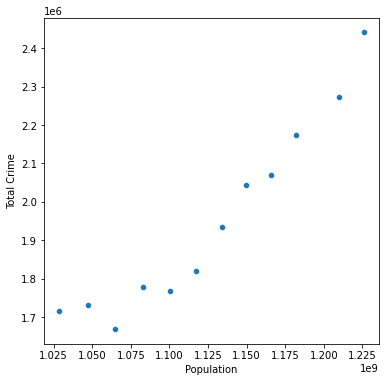

In [76]:
'''Total Crime By Year'''
plt.figure(figsize=(6,6))
sns.scatterplot( x=population_yrs['Population'], y = total_crime_by_Year['TOTAL IPC CRIMES'])
plt.ylabel("Total Crime")
plt.show()
''' total population increses as total crime aslo increses year by year'''

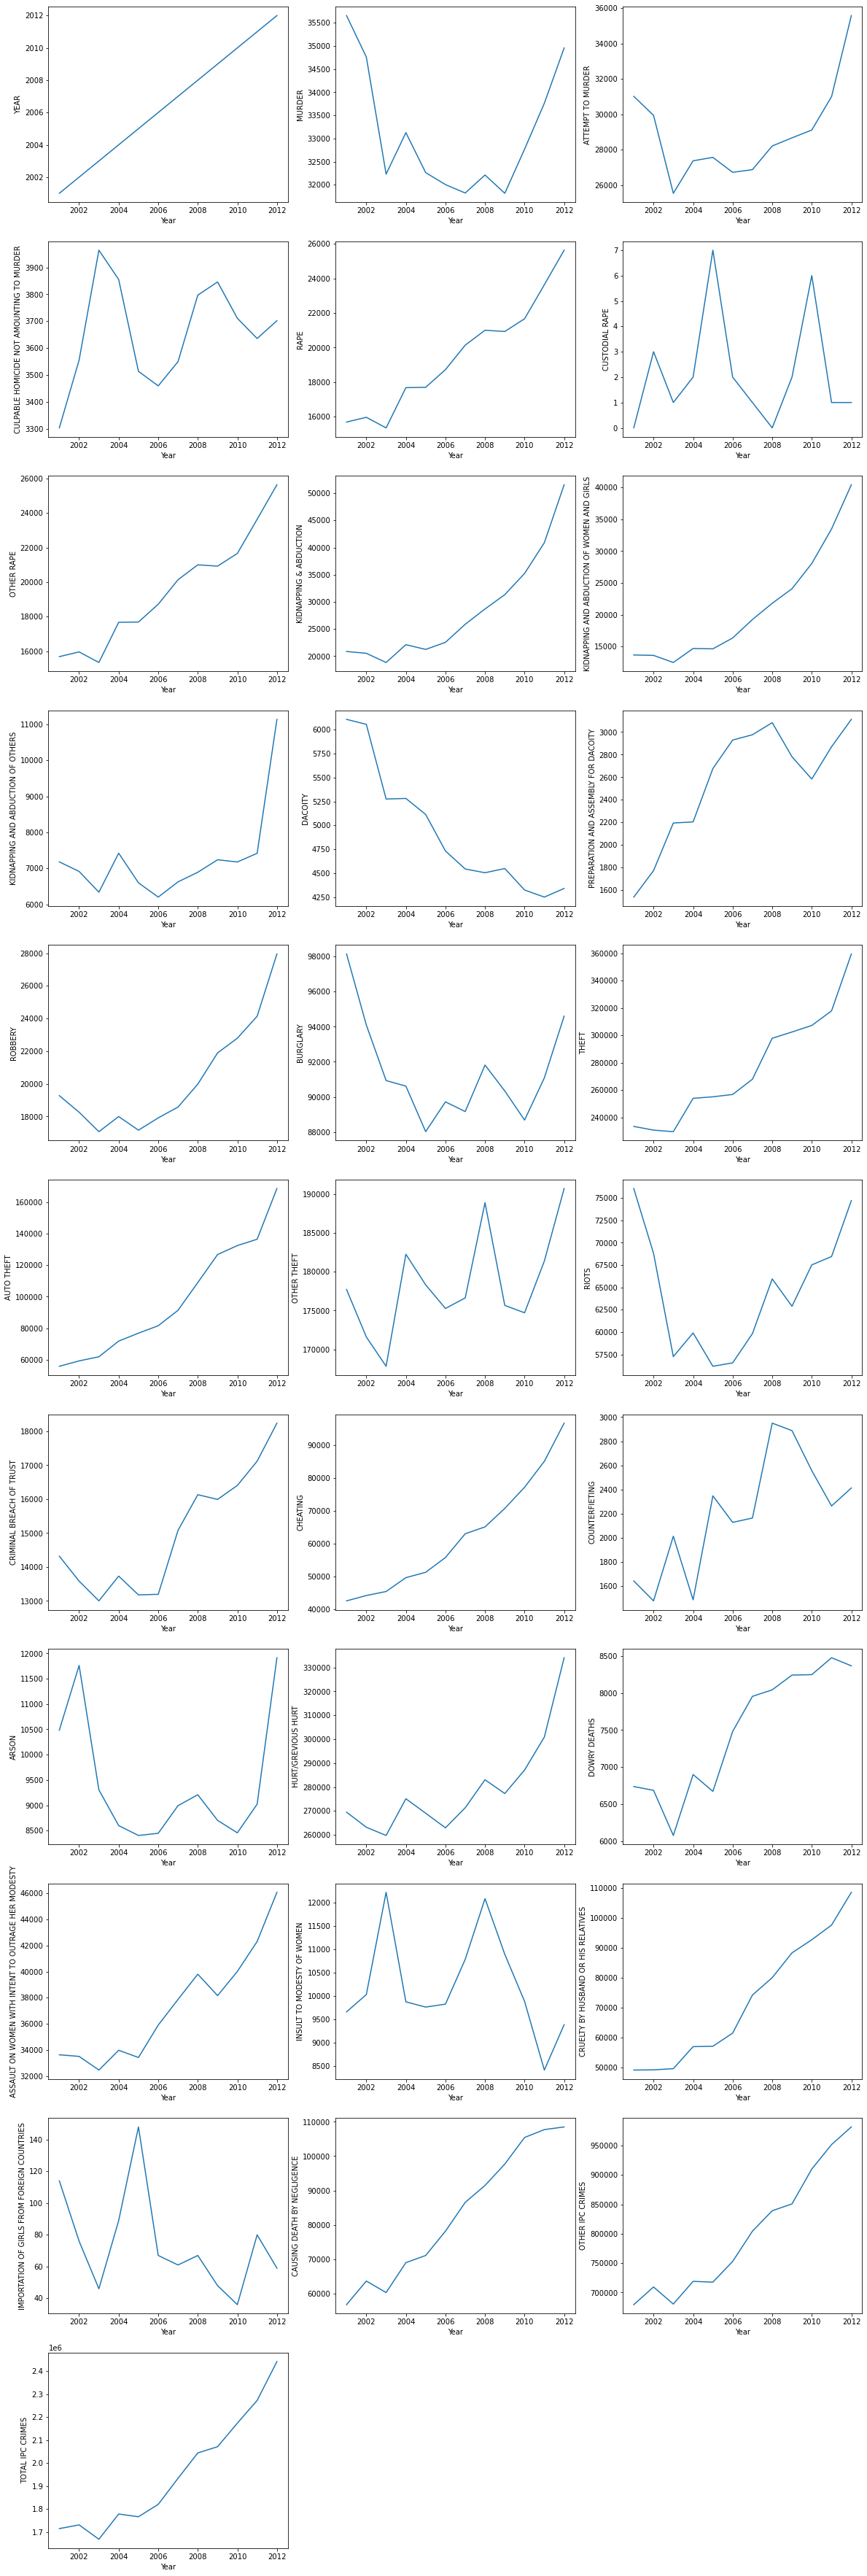

In [77]:
'''Type of crime by Every Year'''
plt.figure(figsize=(20,70))
plotnumber = 1
for i in total_crime_by_Year:
    if plotnumber<=36:
        ax = plt.subplot(12,3,plotnumber)
        sns.lineplot(x =total_crime_by_Year['YEAR'] ,y = total_crime_by_Year[i])
        plt.xlabel('Year')
    plotnumber += 1
    
plt.show()
'''Observation
1.murder is drecresing from 2001 to 2009 after this year murder crimes are incresed
significantly
2.attemp to murder folow same trend as murder
3.rape case are incresing constantly year by year
4. kidnapping of girl and other  also incresed significatly by year
5.dacoity crime are decresed because of prepration for dacoity crime are 
incresed all criminel already arrested
6.robbery,burglay cheating and theft crimes are incresed widely
7.roits crime are drecresing from 2001 to 2006 after that they alos incresed
drastically
8.women related crime and dowery deaths are also incresing year by year and
it is very serious problem
9. imporation girls from forign crime decresed
10 overall all crimes are incresed year by year'''

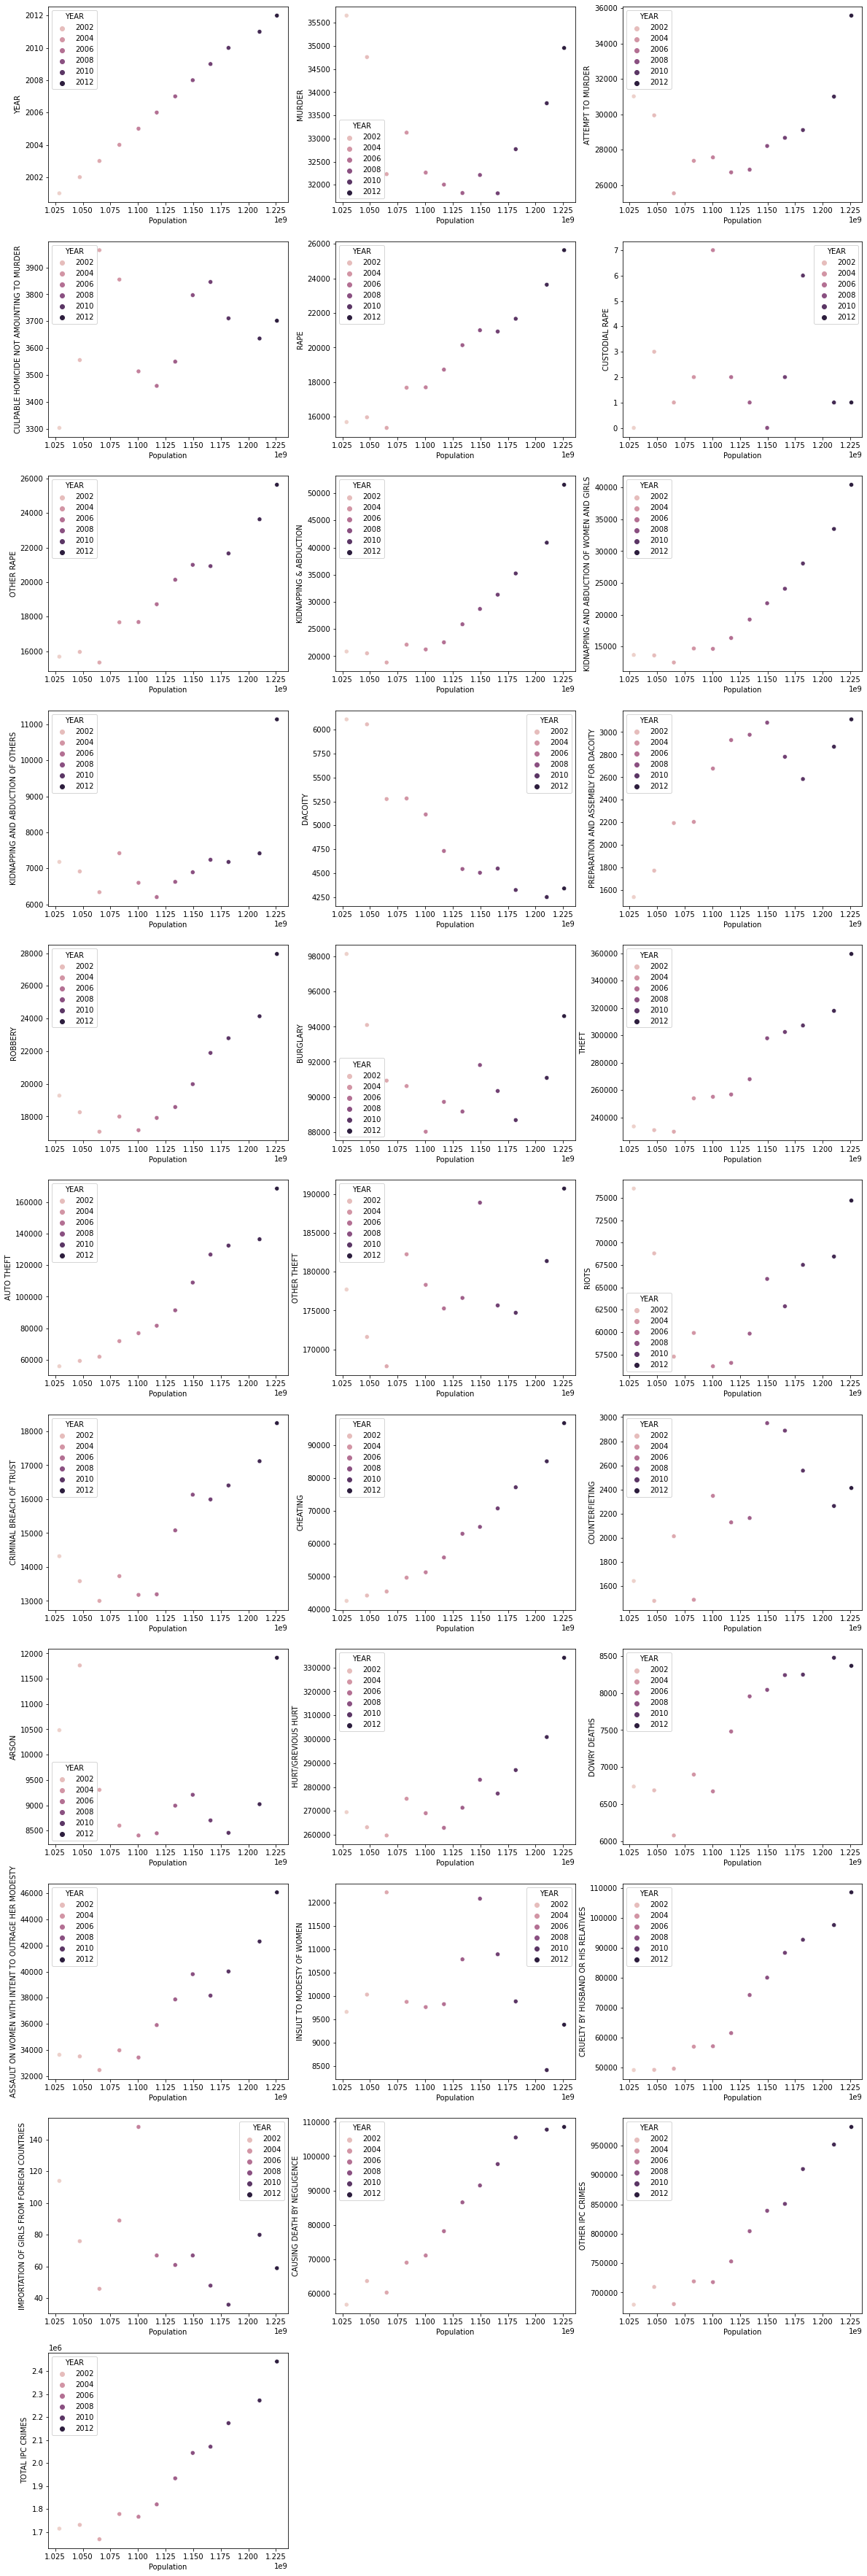

In [78]:
'''Type of crime by Every Year'''
plt.figure(figsize=(20,70))
plotnumber = 1
for i in total_crime_by_Year:
    if plotnumber<=36:
        ax = plt.subplot(12,3,plotnumber)
        sns.scatterplot(x =population_yrs['Population'] ,y = total_crime_by_Year[i],hue=total_crime_by_Year['YEAR'])
    plotnumber += 1
    
plt.show()